## Detect Rambu
This is the 2nd file of myproject Indonesia Traffic Sign Detection. Please see my 1st file which is "detect rambu - EDA.ipynb". Object detection is a computer technology related to computer vision and image processing that deals with detecting instances of semantic objects of a certain class (such as humans, buildings, or cars) in digital images and videos. The goal of my current project is to detect "rambu" from a collection of images and videos and then create a bounding box to state where the object is located. I am using Yolov8 as model architecture with ultralytics library. Dataset obtained from paper "Implementasi Deep Learning untuk Object Detection Menggunakan Algoritma YOLO (You Only Look Once) pada Rambu Lalu Lintas di Indonesia" by Adhy Wiranto Sudjana. Please see my 1st file to collect dataset and EDA.

### 1. Install and import ultralytics library first

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 9.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.2/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

numpy               ✅ 1.25.2<2.0.0
matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 2.0.0>=2.0.0


### 2. Get the pre-trained Yolov8
URL : https://docs.ultralytics.com/tasks/detect/ <br>
There are several pretrained files for detection. First row is the fastest but the result is not to good. I'm using "yolov8m.pt"<img src="yolo pretrained.png">

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.13.1
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.10/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno, ultralytics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8s.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8l.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8x.pt

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8m.pt

### 3. Use yolov8m as pre-trained model

In [ ]:
#%cd MyProject/detect_rambu
model = YOLO("yolov8m.pt")
!pwd

/content


In [ ]:
!ls

'Copy of dataset.yaml'	 dataset.yaml   images	 Kirim	 labels   runs	 yolov8m.pt   yolov8n.pt


### 4. Train the dataset with 25 epoch and batch 8

In [ ]:
model.train(data='./dataset.yaml', epochs=25,imgsz=640, device=0, batch=8 )

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=./dataset.yaml, epochs=25, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, lin

100%|██████████| 755k/755k [00:00<00:00, 15.2MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.3MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [01:26<00:00, 16.92it/s]


train: New cache created: /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:16<00:00, 24.28it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train2
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      4.12G     0.9561      2.771      1.219          6        640: 100%|██████████| 184/184 [00:49<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.71it/s]

                   all        399        429      0.619      0.676      0.711      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      3.98G     0.9107      1.579      1.162         11        640: 100%|██████████| 184/184 [00:48<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]


                   all        399        429      0.701      0.776      0.808      0.658

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      4.07G     0.9053      1.397       1.16          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.748      0.746      0.821      0.651

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      4.06G     0.8904      1.146       1.13          8        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.841      0.824      0.882       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      4.07G     0.8652      1.034      1.123          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        399        429      0.826      0.842      0.872      0.698

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      4.06G     0.8349     0.9657      1.105          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.899      0.851      0.935      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      4.06G     0.8207      0.891      1.089          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.872      0.872      0.912      0.748

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      4.07G     0.8032     0.8257      1.079         14        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.886      0.895      0.931      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      4.05G     0.7814     0.7564      1.063          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]

                   all        399        429      0.916      0.887      0.949       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      4.07G     0.7646     0.7192       1.06          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]

                   all        399        429      0.925      0.898      0.942      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      4.06G     0.7355     0.6894       1.03          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.902      0.915      0.926      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      4.06G     0.7262     0.6445      1.032         15        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429       0.93      0.931      0.953        0.8

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      4.03G      0.727     0.6356      1.027          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.939      0.929      0.958      0.796

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      4.06G     0.7046     0.6318      1.033         16        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        399        429      0.951      0.901      0.961      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      4.06G     0.6906     0.5832      1.028          9        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.948      0.927      0.972      0.819
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      4.06G      0.624     0.4154     0.9691          7        640: 100%|██████████| 184/184 [00:48<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.946      0.939      0.966      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      4.06G     0.6238     0.3999     0.9565          7        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.951      0.923      0.966      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      4.06G      0.611     0.3859     0.9529          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.952      0.935      0.964      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      4.05G     0.5877     0.3618     0.9406          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.953      0.933      0.968       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      4.05G     0.5772       0.34     0.9354          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.965      0.951      0.978      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      4.06G     0.5523     0.3175     0.9235          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.935      0.933       0.97      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      4.06G     0.5445     0.3117     0.9184          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.952      0.935      0.969      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      4.06G     0.5227     0.2947     0.9101          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]


                   all        399        429       0.96      0.948      0.974      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      4.05G     0.5087      0.281     0.8944          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.965      0.945      0.974      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      4.06G     0.4952     0.2662     0.8889          6        640: 100%|██████████| 184/184 [00:47<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.963      0.942      0.974      0.834

25 epochs completed in 0.374 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 52.0MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]


                   all        399        429       0.96      0.948      0.974      0.834
     larangan berhenti         19         19      0.944          1      0.995      0.932
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.932      0.947      0.982        0.9
       larangan parkir         19         20       0.94       0.85      0.929      0.845
           lampu hijau         19         35      0.955      0.914      0.951      0.745
          lampu kuning         19         19      0.839      0.789      0.851      0.623
           lampu merah         19         19          1      0.859      0.979      0.759
  larangan belok kanan         19         20      0.916        0.9      0.968      0.924
   larangan belok kiri         19         23      0.981      0.957      0.992      0.905
larangan berjalan terus wajib berhenti sesaat         19         23      0.969      0.957      0.965      0.766
larangan memutar balik         19         19      0.

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d017456b010>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

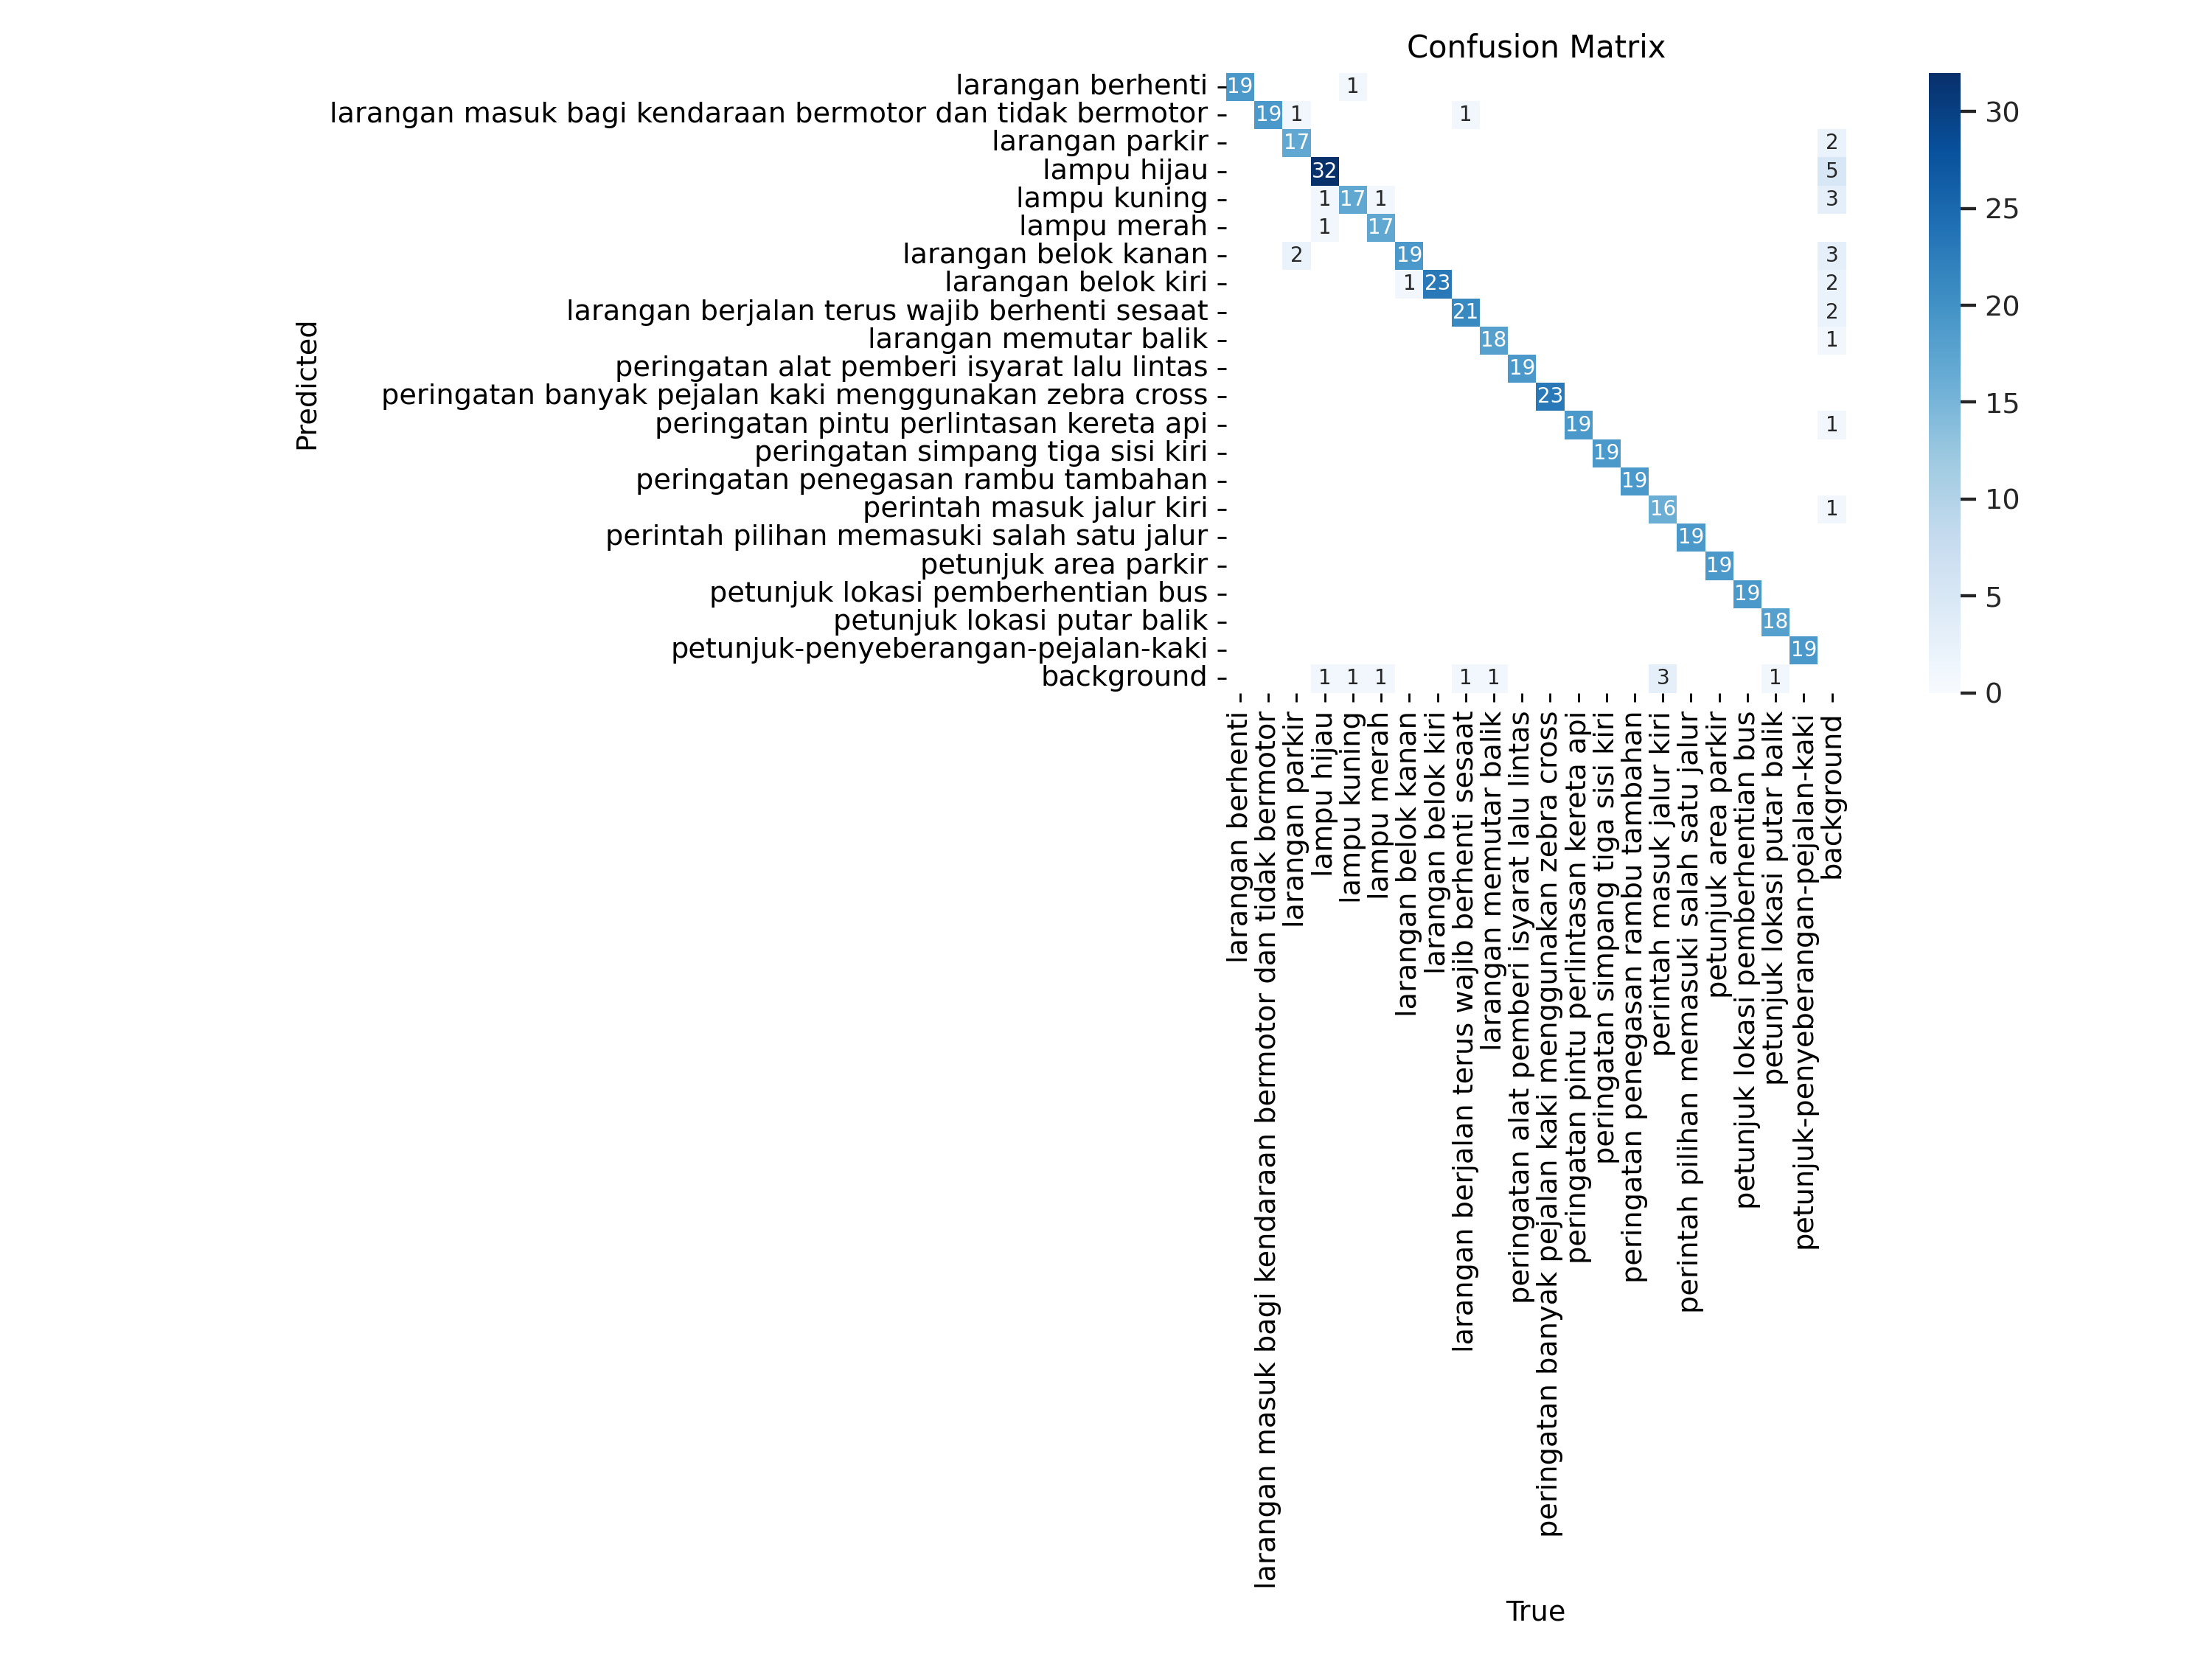

In [ ]:
Image(filename='runs/detect/train2/confusion_matrix.png', width=800)

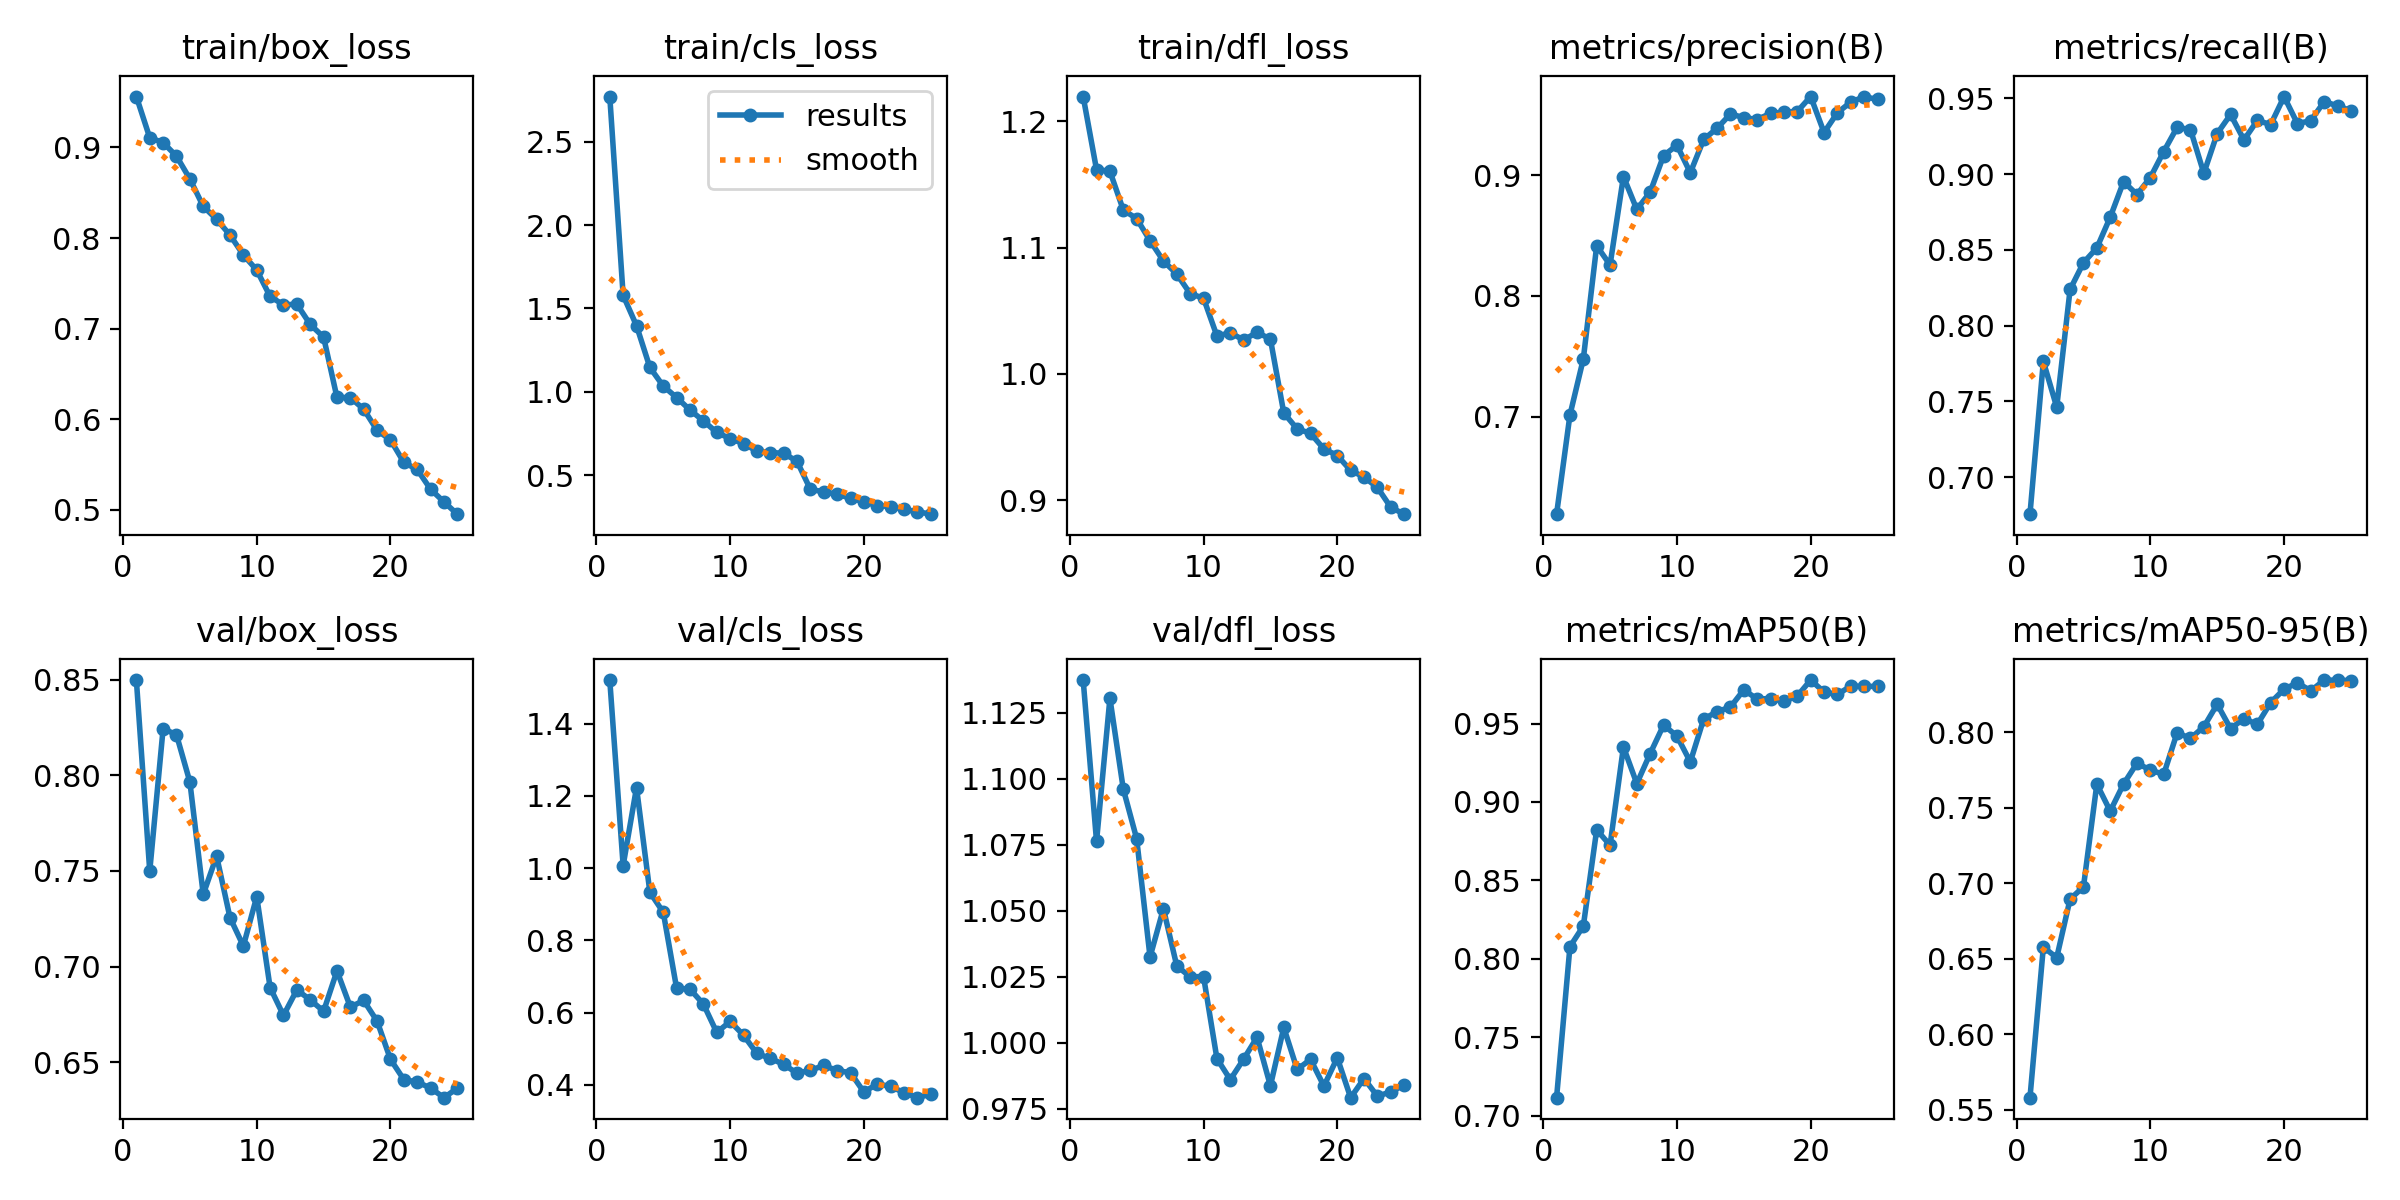

In [ ]:
Image(filename='runs/detect/train2/results.png')

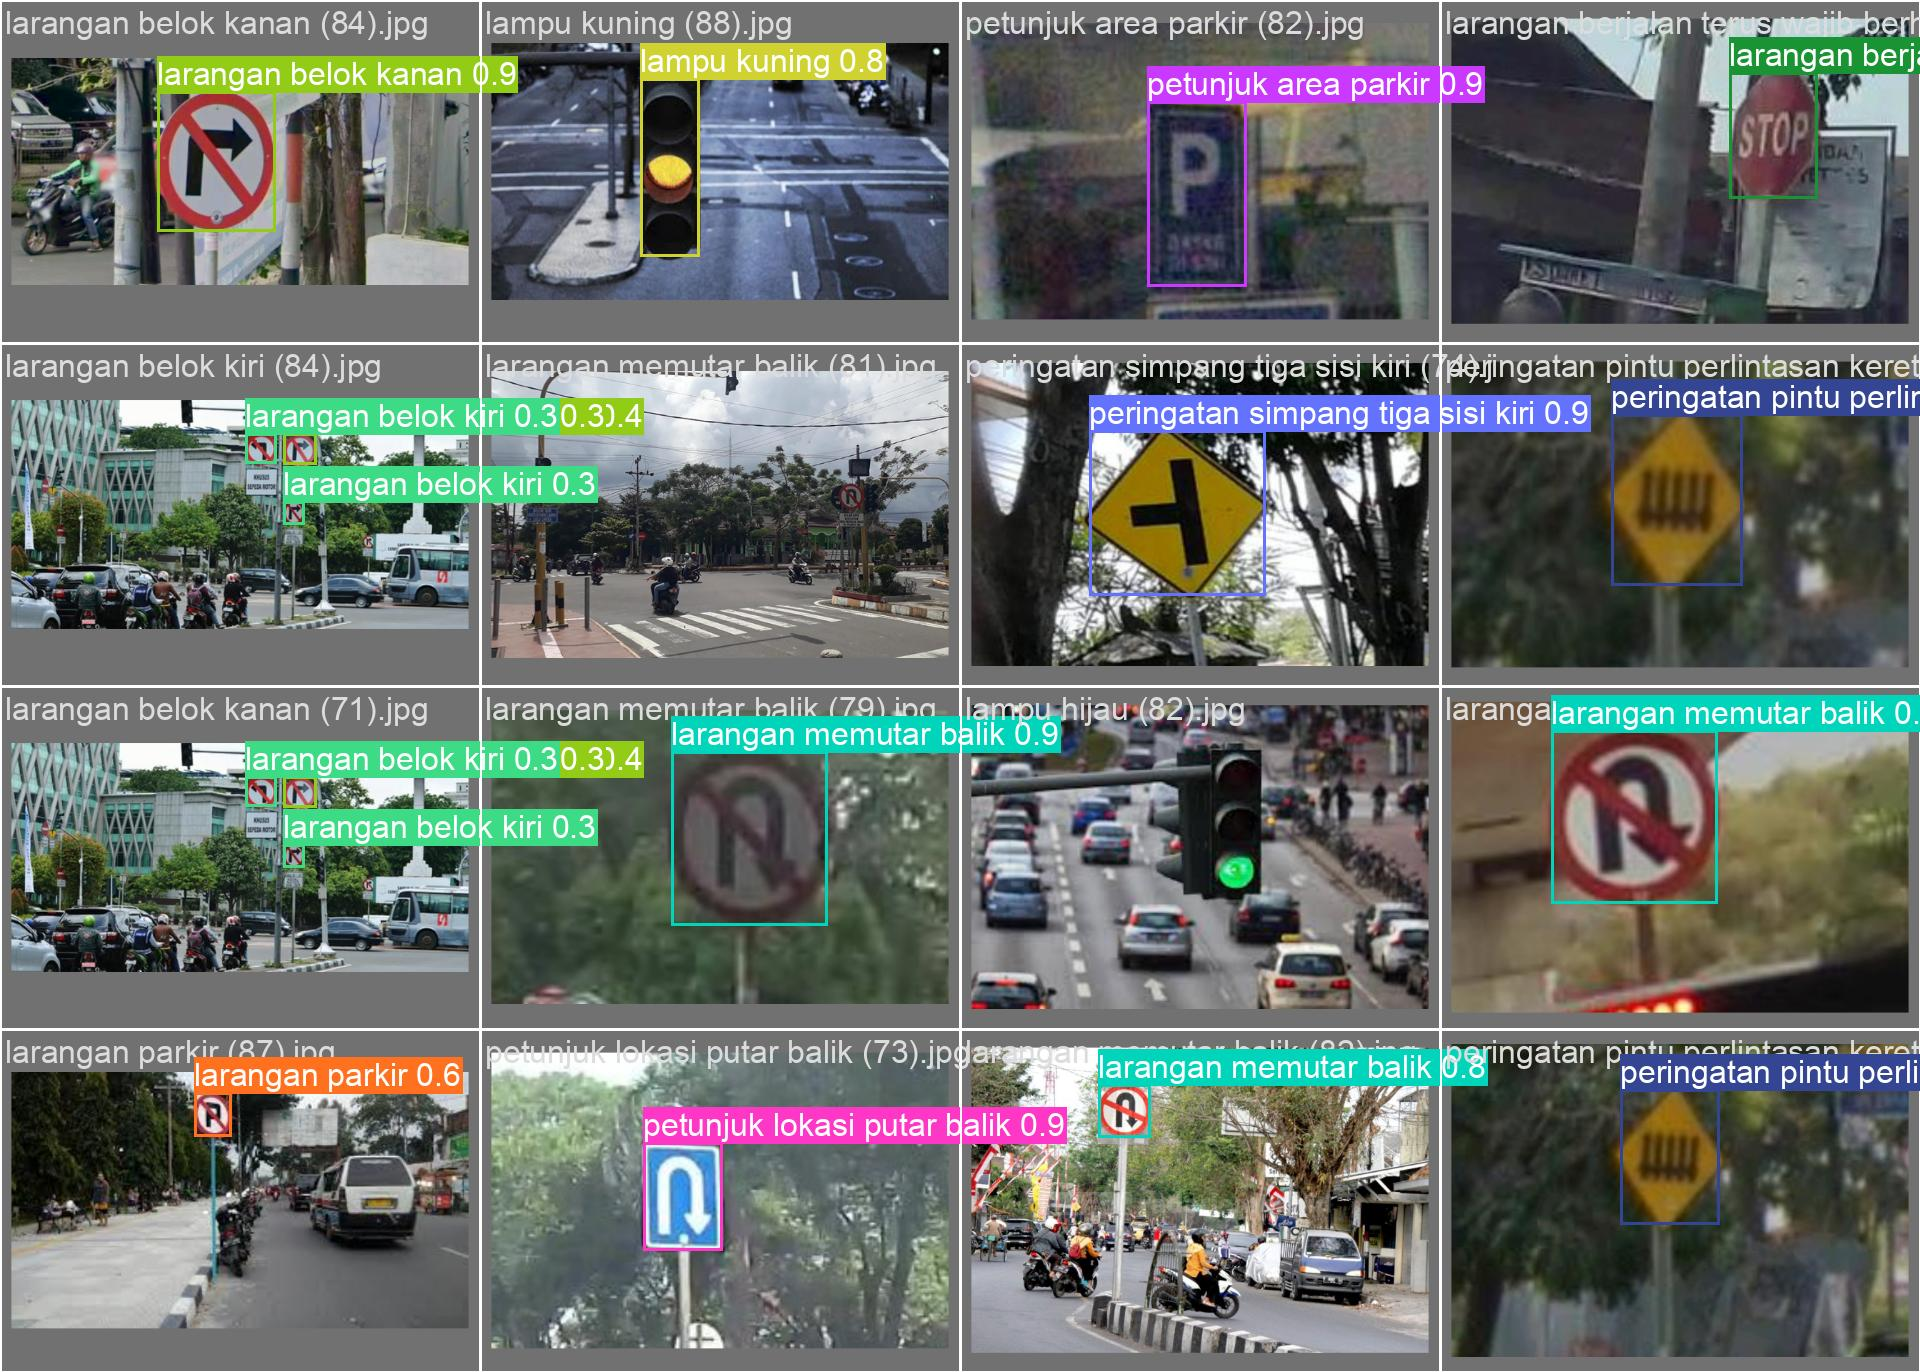

In [ ]:
Image(filename=f'runs/detect/train2/val_batch0_pred.jpg', width=1024)

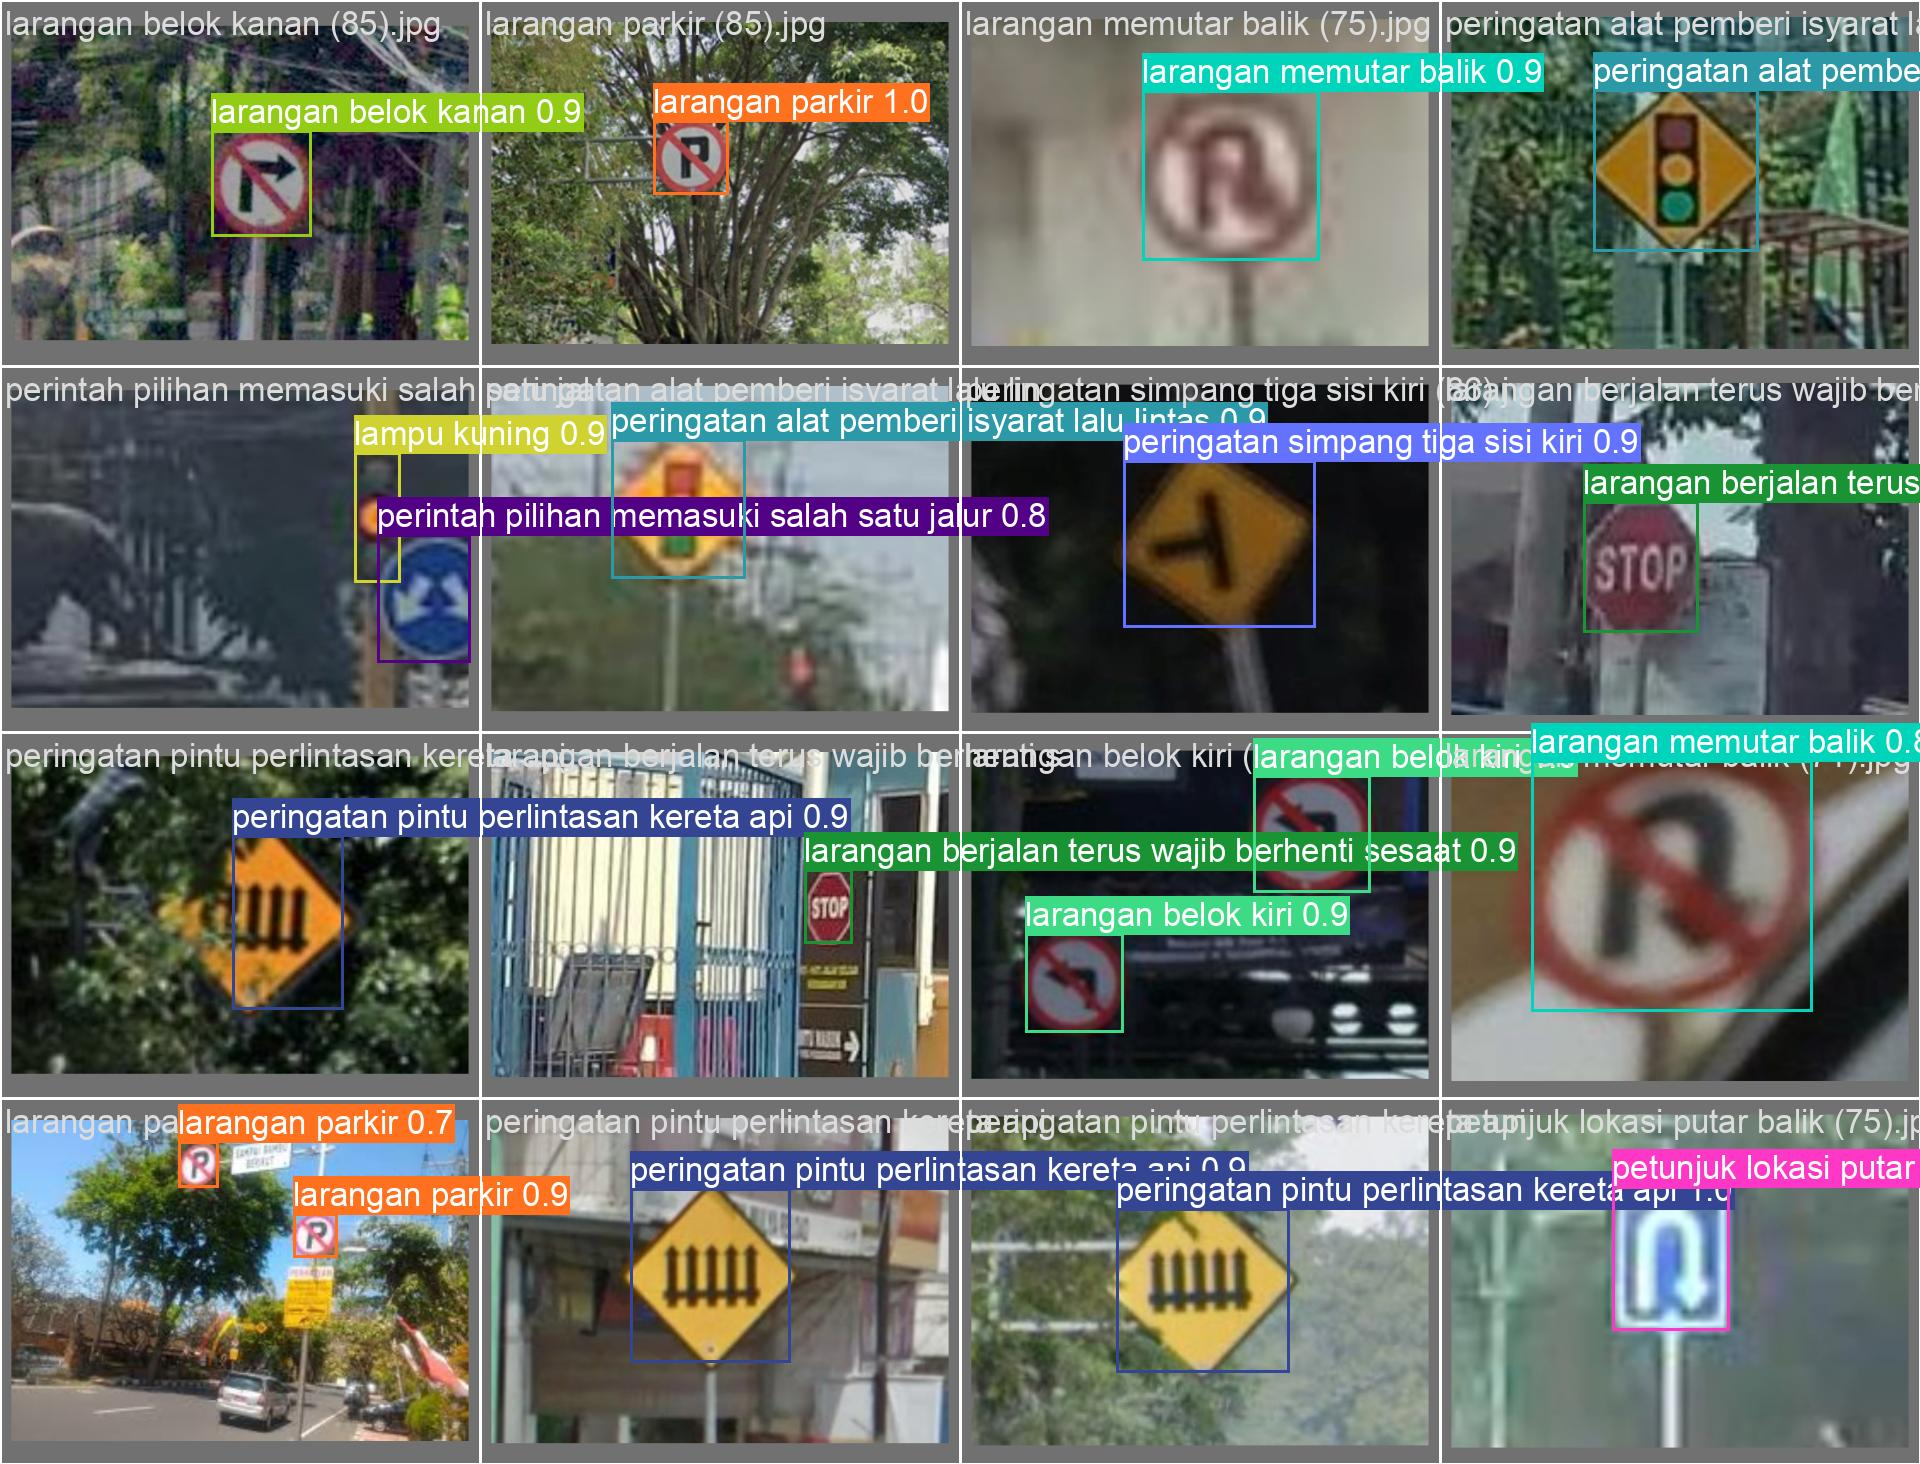

In [ ]:
Image(filename=f'runs/detect/train2/val_batch1_pred.jpg', width=1024)

In [ ]:
model = YOLO("runs/detect/train2/weights/best.pt")

In [ ]:
predict_result = model.predict(source='images/test', conf=0.25, save=True)


image 1/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (100).jpg: 512x640 1 lampu hijau, 91.9ms
image 2/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (90).jpg: 288x640 2 lampu hijaus, 98.8ms


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


image 3/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (91).jpg: 640x448 1 lampu hijau, 125.4ms
image 4/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (92).jpg: 640x448 1 lampu hijau, 27.3ms
image 5/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (93).jpg: 640x416 1 lampu hijau, 91.7ms
image 6/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (94).jpg: 448x640 1 lampu hijau, 81.3ms
image 7/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (95).jpg: 640x448 1 lampu hijau, 28.6ms
image 8/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (96).jpg: 256x640 1 lampu hijau, 96.3ms
image 9/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (97).jpg: 640x480 1 lampu hijau, 71.6ms
image 10/231 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu hijau (98).jpg: 640x

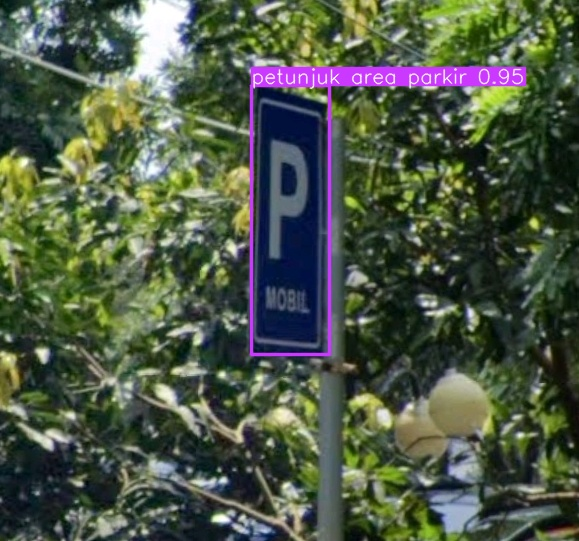

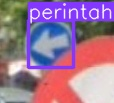

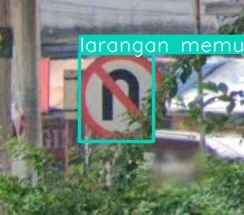

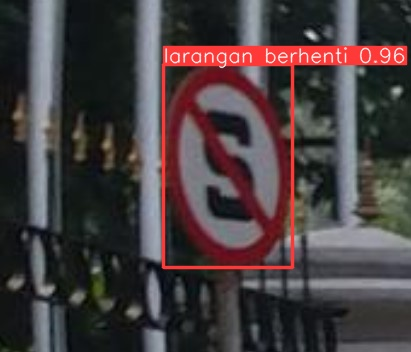

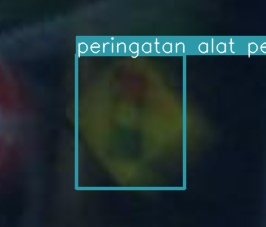

In [ ]:
import glob, random
from IPython.display import Image, display

for image_path in random.choices(glob.glob(f'runs/detect/predict/*.jpg'), k=5):
      display(Image(filename=image_path, width=300))
      print("\n")

### 5.   Train again, hence the total epoch = **100**




In [ ]:
### Train again, hence the total epoch = 100

In [ ]:
model = YOLO("runs/detect/train2/weights/last.pt")

In [ ]:
model.train(data='./dataset.yaml', epochs=75,imgsz=640, device=0, batch=8 )

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train2/weights/last.pt, data=./dataset.yaml, epochs=75, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tr

train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 75 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/75      4.29G      0.607     0.5061     0.9774          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:19<00:00,  1.31it/s]

                   all        399        429      0.949      0.923      0.963      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/75      4.17G     0.6645     0.5696          1         11        640: 100%|██████████| 184/184 [00:45<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.15it/s]


                   all        399        429      0.924      0.931      0.966      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/75      4.27G     0.6978     0.6393      1.027          9        640: 100%|██████████| 184/184 [00:45<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.912      0.873      0.939      0.773

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/75      4.25G     0.7134     0.6812      1.035          8        640: 100%|██████████| 184/184 [00:45<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.899      0.856      0.933      0.783

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/75      4.27G     0.7218     0.6687       1.04          6        640: 100%|██████████| 184/184 [00:46<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.936      0.898      0.954      0.787

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/75      4.27G      0.694     0.6245      1.027          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.927      0.895      0.947      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/75      4.27G     0.7166     0.6319      1.041          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.923      0.909      0.944      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/75      4.25G     0.7037     0.6194       1.03         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.951      0.924       0.95      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/75      4.27G     0.6834     0.6017      1.017          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.948      0.906      0.959      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/75      4.26G     0.6895      0.599      1.029          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.943      0.895       0.94      0.779

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/75      4.26G     0.6688     0.5863      1.001          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.932      0.901      0.946      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/75      4.26G     0.6783     0.5723      1.019         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.944      0.897      0.944      0.785

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/75      4.24G     0.6821     0.5814      1.009          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.955      0.926      0.956      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/75      4.26G     0.6637     0.5539      1.017         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.948      0.936      0.958      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/75      4.26G     0.6624      0.541       1.02          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]

                   all        399        429      0.943      0.915      0.958      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/75      4.24G     0.6747     0.5516      1.014         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]

                   all        399        429      0.946      0.929      0.954      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/75      4.24G     0.6679     0.5524      1.014          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.947      0.937      0.954      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/75      4.27G     0.6504     0.5189      1.005         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.951      0.939      0.971      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/75      4.23G     0.6658     0.5191      1.019          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429       0.93      0.909      0.956      0.802

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/75      4.26G     0.6435     0.5319     0.9978          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.934       0.93       0.96      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/75      4.26G     0.6391     0.5177     0.9949         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.951      0.941      0.972      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/75      4.25G      0.644       0.51      1.021         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.943      0.941      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/75      4.26G     0.6242     0.4871     0.9948         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429       0.96      0.941      0.965      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/75      4.23G     0.6268     0.4883     0.9939         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.952      0.933      0.959      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/75      4.25G      0.614     0.4695     0.9963         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.946      0.946      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/75      4.24G     0.6215      0.454     0.9966          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.932      0.941      0.958      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/75      4.26G     0.5987     0.4715      0.987         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.924      0.932      0.954      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/75      4.25G      0.609     0.4637     0.9951          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.945      0.944      0.962      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/75      4.25G     0.6056     0.4659     0.9989          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.955      0.934      0.967      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/75      4.26G     0.5986     0.4498      0.984         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.941      0.937      0.964       0.81

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/75      4.27G     0.5966     0.4522     0.9766         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.951      0.933      0.966      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/75      4.25G     0.5959     0.4348     0.9806         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]

                   all        399        429      0.961      0.928       0.97       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/75      4.26G     0.5995     0.4557     0.9957         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429       0.95      0.931       0.96      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/75      4.26G     0.5739     0.4296     0.9784         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.946      0.944      0.966      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/75      4.27G      0.576      0.437     0.9958         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        399        429      0.948      0.924      0.958      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/75      4.26G     0.5606     0.4131     0.9782         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]

                   all        399        429      0.969      0.933      0.975      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/75      4.26G     0.5578     0.3909     0.9721         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.964      0.939      0.961      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/75      4.26G     0.5735     0.4037     0.9849          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.965      0.927      0.962      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/75      4.27G      0.547      0.402     0.9726         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.941      0.937      0.962      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/75      4.26G     0.5441     0.3943     0.9745         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.949      0.915      0.958      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/75      4.26G      0.544     0.4033     0.9759         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.943       0.93      0.954      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/75      4.26G     0.5348     0.3781     0.9684         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.962       0.93      0.961      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/75      4.23G     0.5259     0.3804     0.9676          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.959      0.955       0.97      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/75      4.25G     0.5354     0.3827     0.9662         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.973      0.922      0.964      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/75      4.26G     0.5482     0.3882     0.9695         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.971      0.938      0.968       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/75      4.26G     0.5278     0.3779     0.9563         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.964      0.926      0.966      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/75      4.26G     0.5174     0.3625     0.9463         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.933      0.948      0.963      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/75      4.26G     0.5185     0.3691     0.9597         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.944      0.924      0.945      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/75      4.26G     0.5052     0.3459     0.9351          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.958      0.934      0.965      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/75      4.24G     0.5034     0.3603     0.9457          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.965      0.941       0.97      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/75      4.26G     0.5005     0.3502     0.9436         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429       0.95      0.942      0.965      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/75      4.26G     0.4985     0.3449     0.9423          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.967      0.936      0.968      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/75      4.26G       0.48      0.329     0.9358         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.968      0.938      0.971      0.838

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/75      4.25G     0.4813     0.3316     0.9396         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.963      0.922      0.959      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/75      4.26G     0.4875     0.3461     0.9509         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.964      0.935      0.965      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/75      4.24G     0.4668     0.3243      0.945         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.963      0.938      0.965      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/75      4.26G     0.4609     0.3135     0.9421         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.968      0.943      0.965      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/75      4.26G      0.469     0.3243     0.9386         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.962      0.948      0.967       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/75      4.25G     0.4605     0.3207     0.9321          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.958      0.947      0.963      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/75      4.26G     0.4617       0.32     0.9298          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.954      0.937      0.964      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/75      4.23G     0.4502     0.3141     0.9175         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.962      0.933      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/75      4.26G     0.4467     0.2971     0.9297         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.957      0.934       0.96      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/75      4.25G     0.4303     0.2955     0.9203         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.954      0.937      0.966      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/75      4.26G     0.4532     0.3034     0.9313          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.957      0.929      0.961      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/75      4.25G     0.4301     0.2969     0.9215         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.936      0.947      0.959      0.832
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/75      4.24G     0.3663     0.1973     0.8381          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.961      0.913      0.954      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/75      4.25G     0.3672     0.1894     0.8373          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]

                   all        399        429       0.95      0.935      0.958      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/75      4.25G     0.3554     0.1877     0.8379          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.971      0.919      0.962      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/75      4.26G     0.3491     0.1837      0.839          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.971      0.922      0.964      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/75      4.25G     0.3395     0.1827     0.8331          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.973      0.924      0.961      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/75      4.26G     0.3329     0.1801     0.8282          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.974      0.926      0.962      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      72/75      4.26G     0.3259     0.1811     0.8261          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.962      0.933      0.963       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      73/75      4.25G     0.3272      0.173     0.8281          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.91it/s]


                   all        399        429      0.954      0.947      0.966       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      74/75      4.26G     0.3207     0.1702      0.828          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.953      0.949      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      75/75      4.25G     0.3174     0.1732     0.8313          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.954      0.946      0.964      0.831

75 epochs completed in 1.103 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.1MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.97it/s]


                   all        399        429      0.968      0.938      0.971      0.838
     larangan berhenti         19         19      0.972          1      0.995      0.937
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.994          1      0.995      0.937
       larangan parkir         19         20      0.947        0.9      0.983      0.902
           lampu hijau         19         35      0.982      0.857      0.985       0.81
          lampu kuning         19         19      0.816        0.7      0.881      0.646
           lampu merah         19         19      0.985      0.684      0.846       0.67
  larangan belok kanan         19         20      0.989        0.9      0.956       0.92
   larangan belok kiri         19         23       0.88          1      0.995      0.898
larangan berjalan terus wajib berhenti sesaat         19         23      0.987      0.957      0.971       0.77
larangan memutar balik         19         19       0

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb944639b70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
model = YOLO("runs/detect/train3/weights/best.pt")

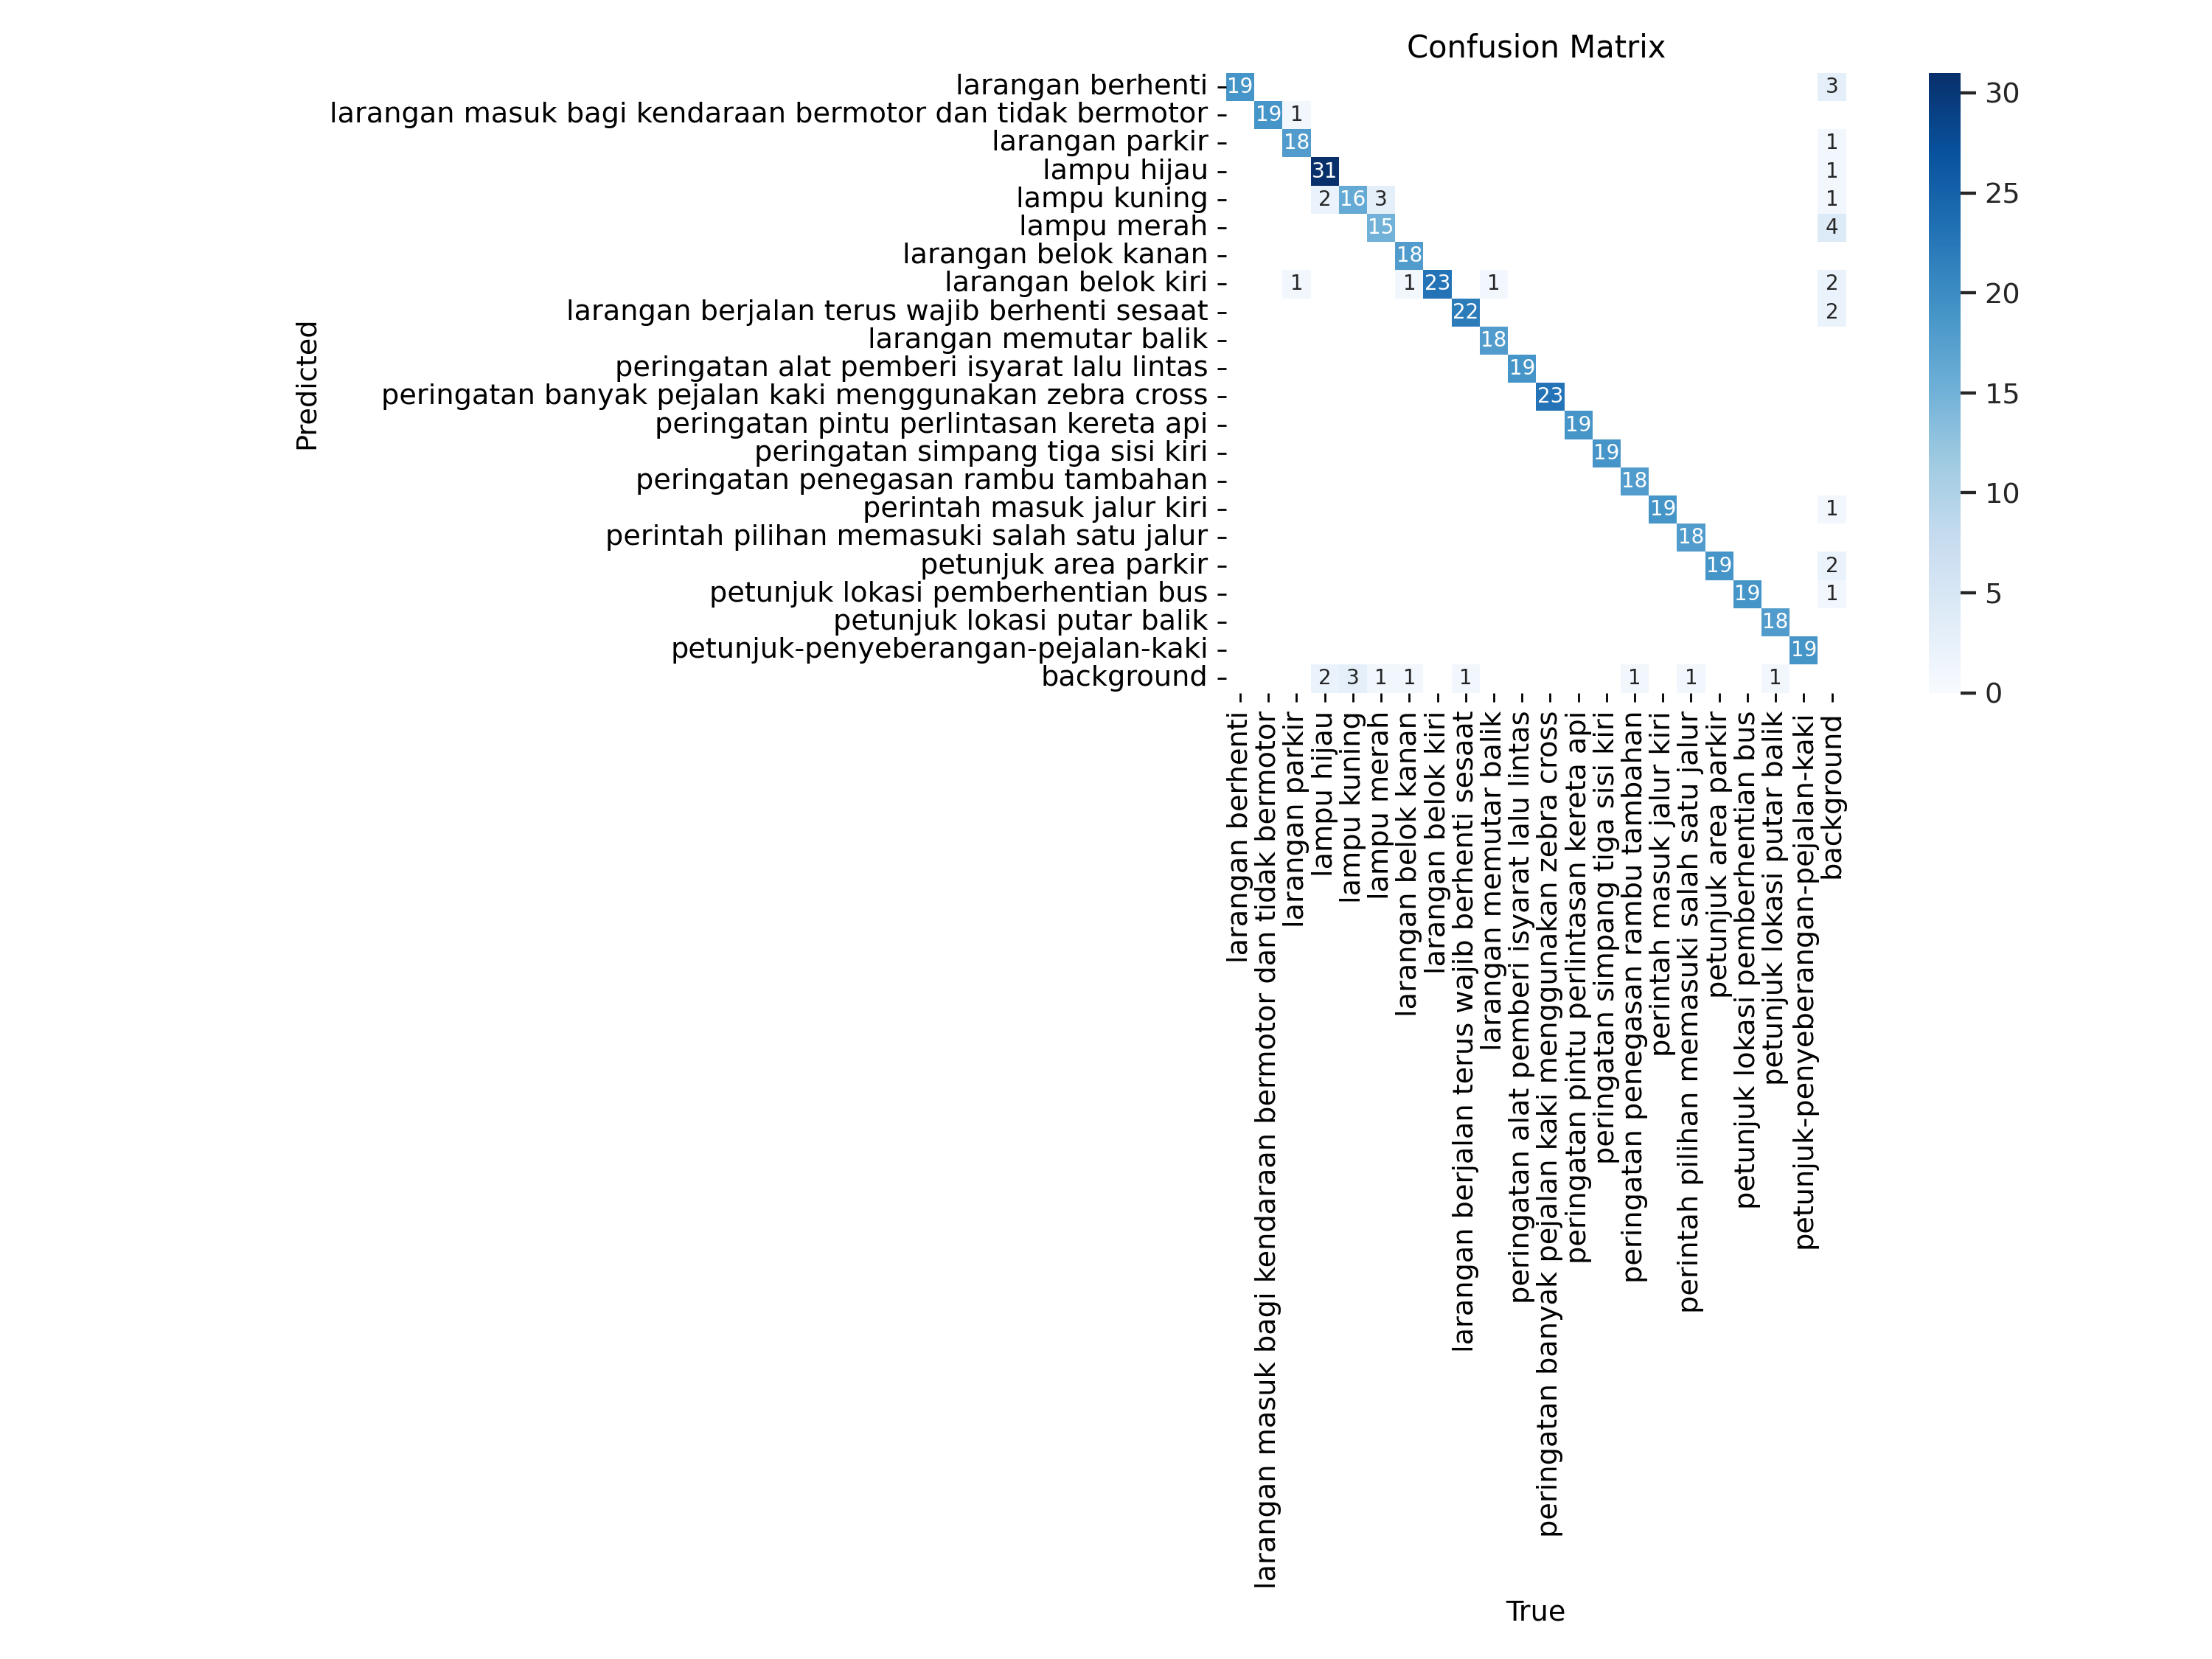

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=800)

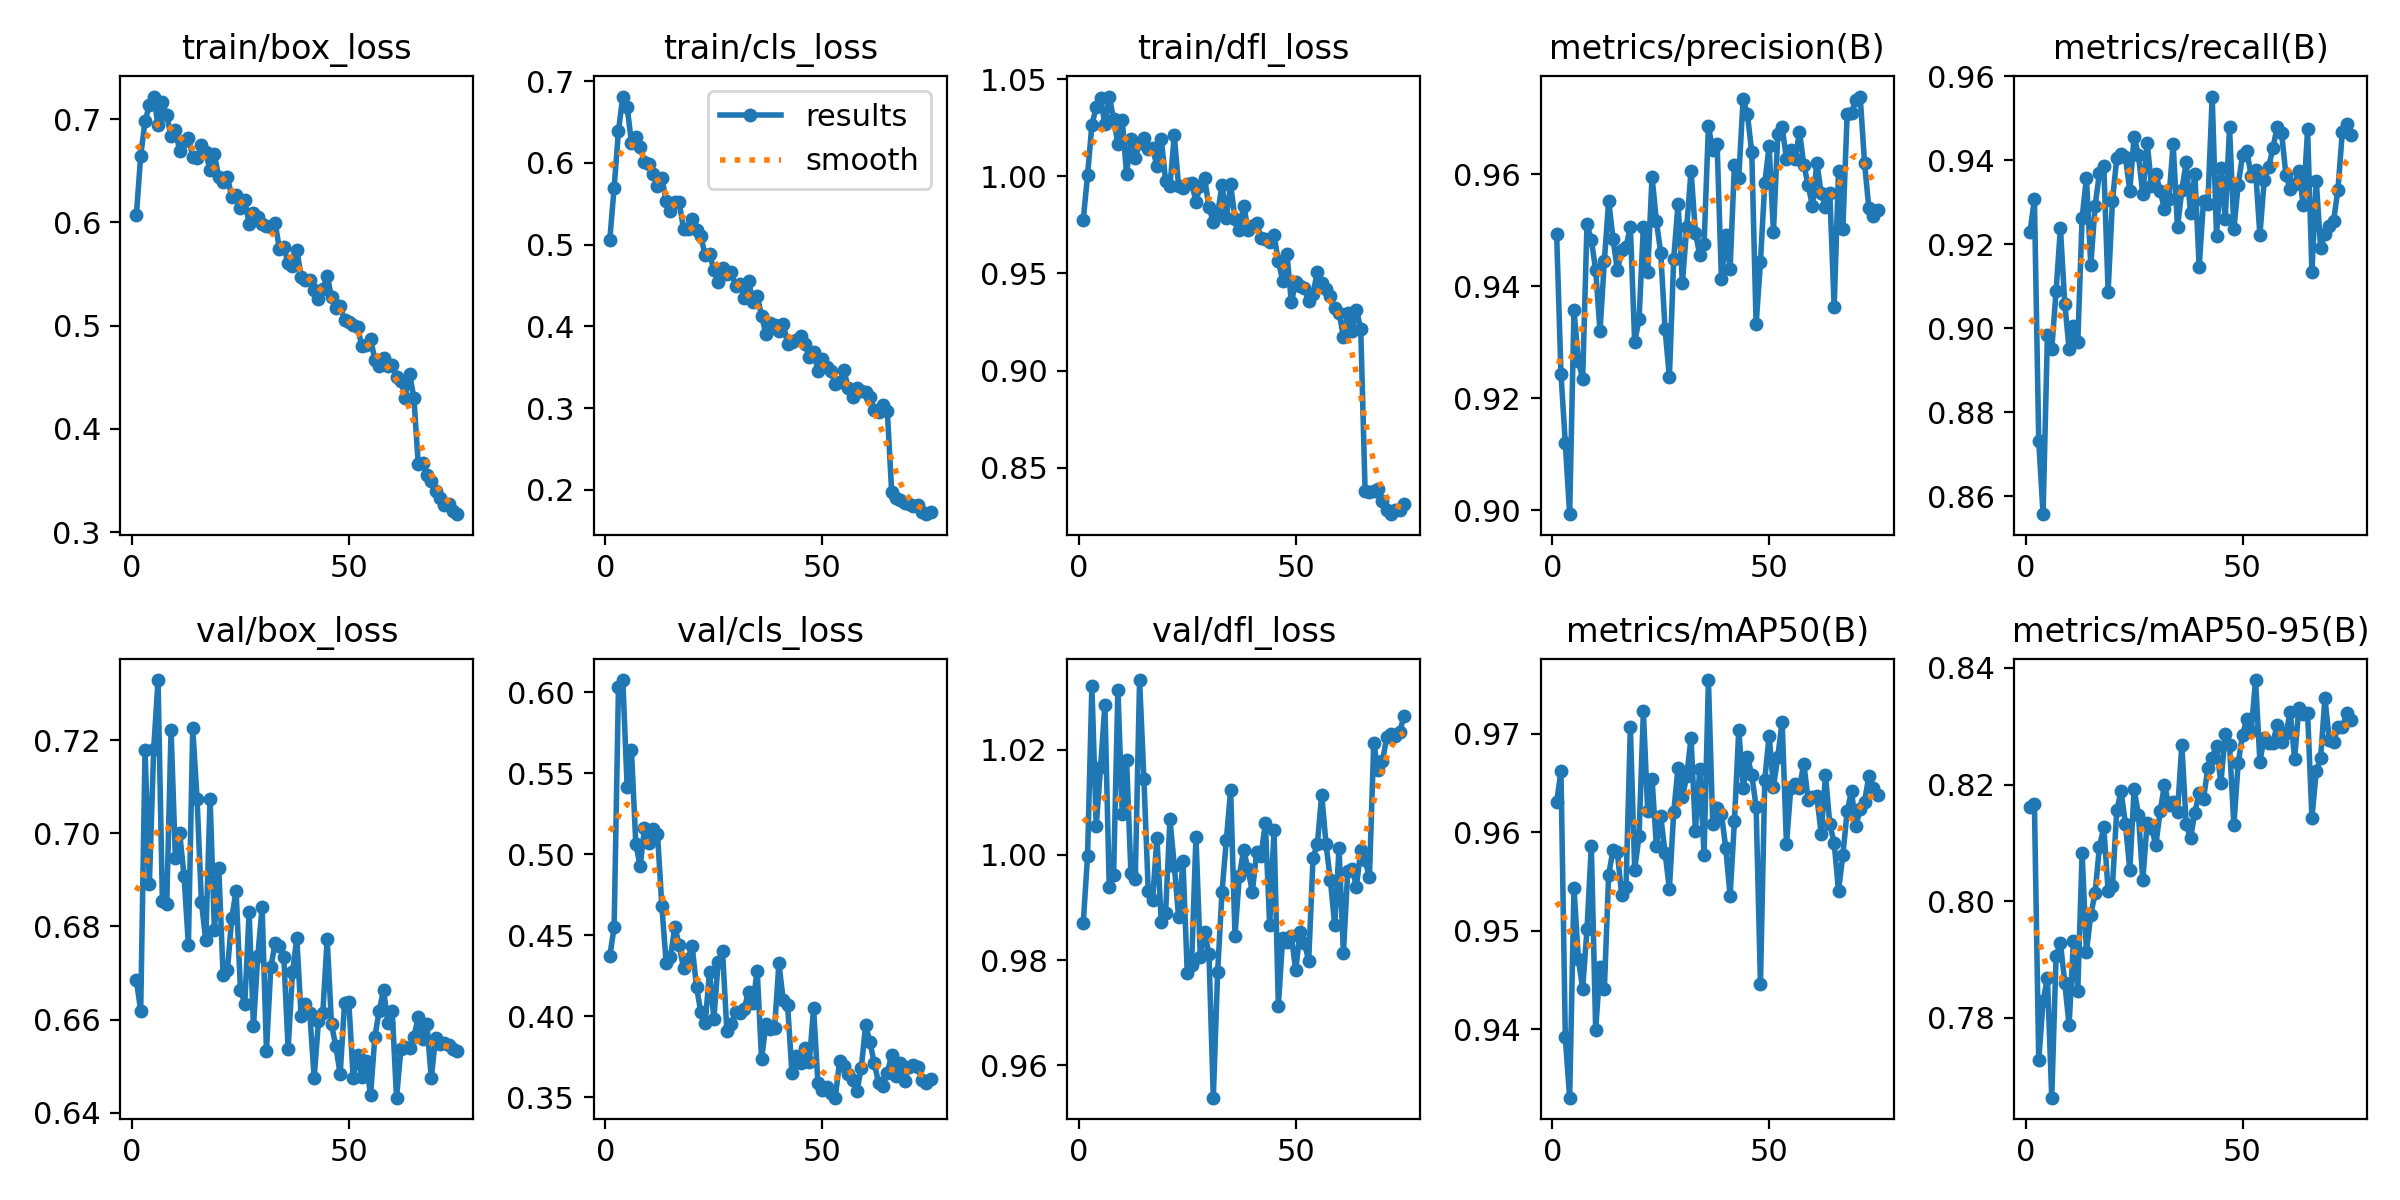

In [ ]:
Image(filename='runs/detect/train3/results.png')

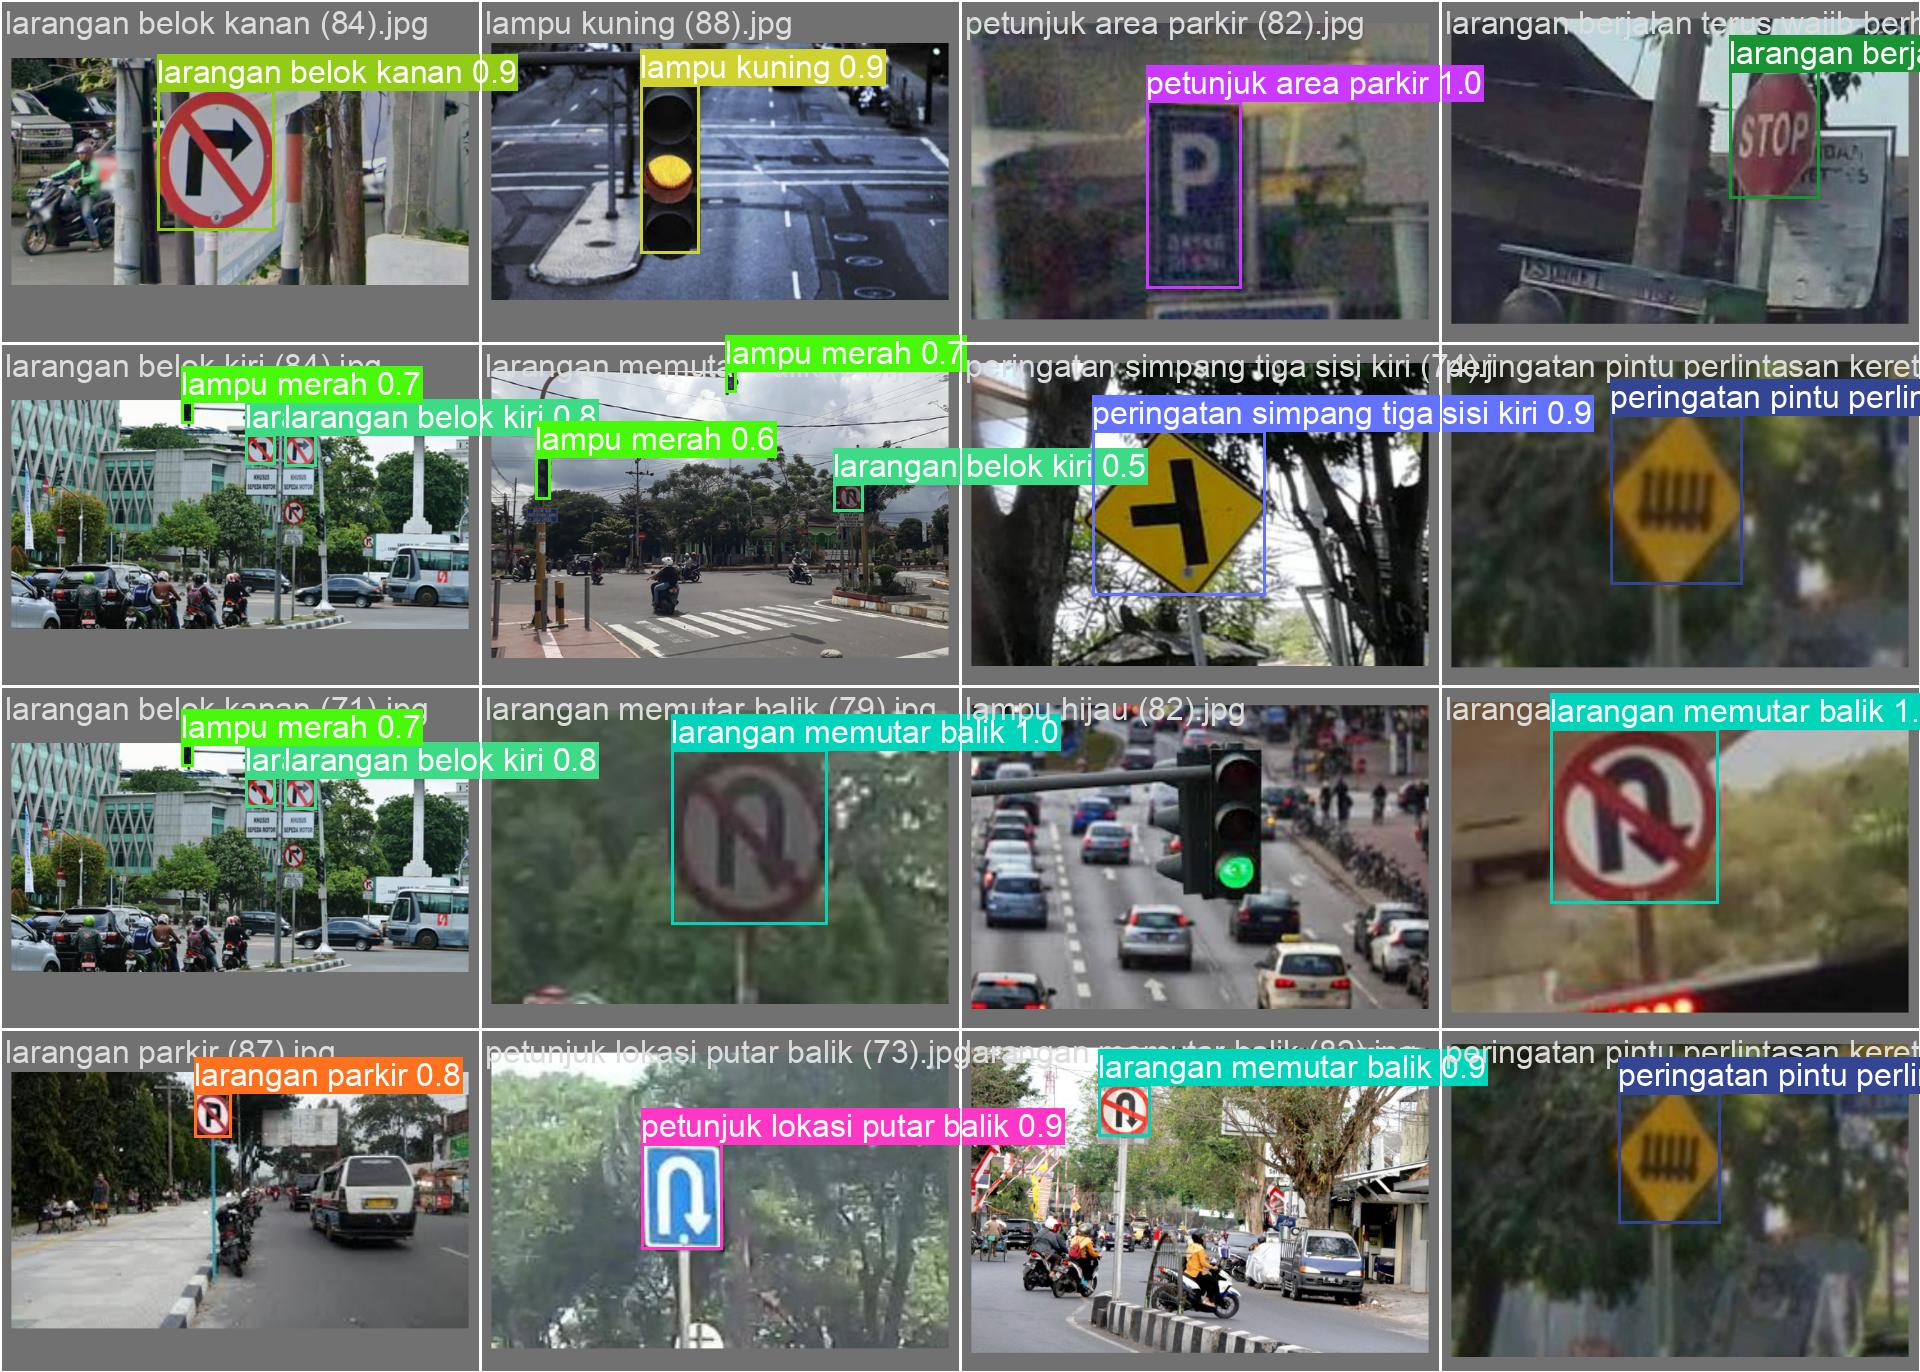

In [ ]:
Image(filename=f'runs/detect/train3/val_batch0_pred.jpg', width=1024)

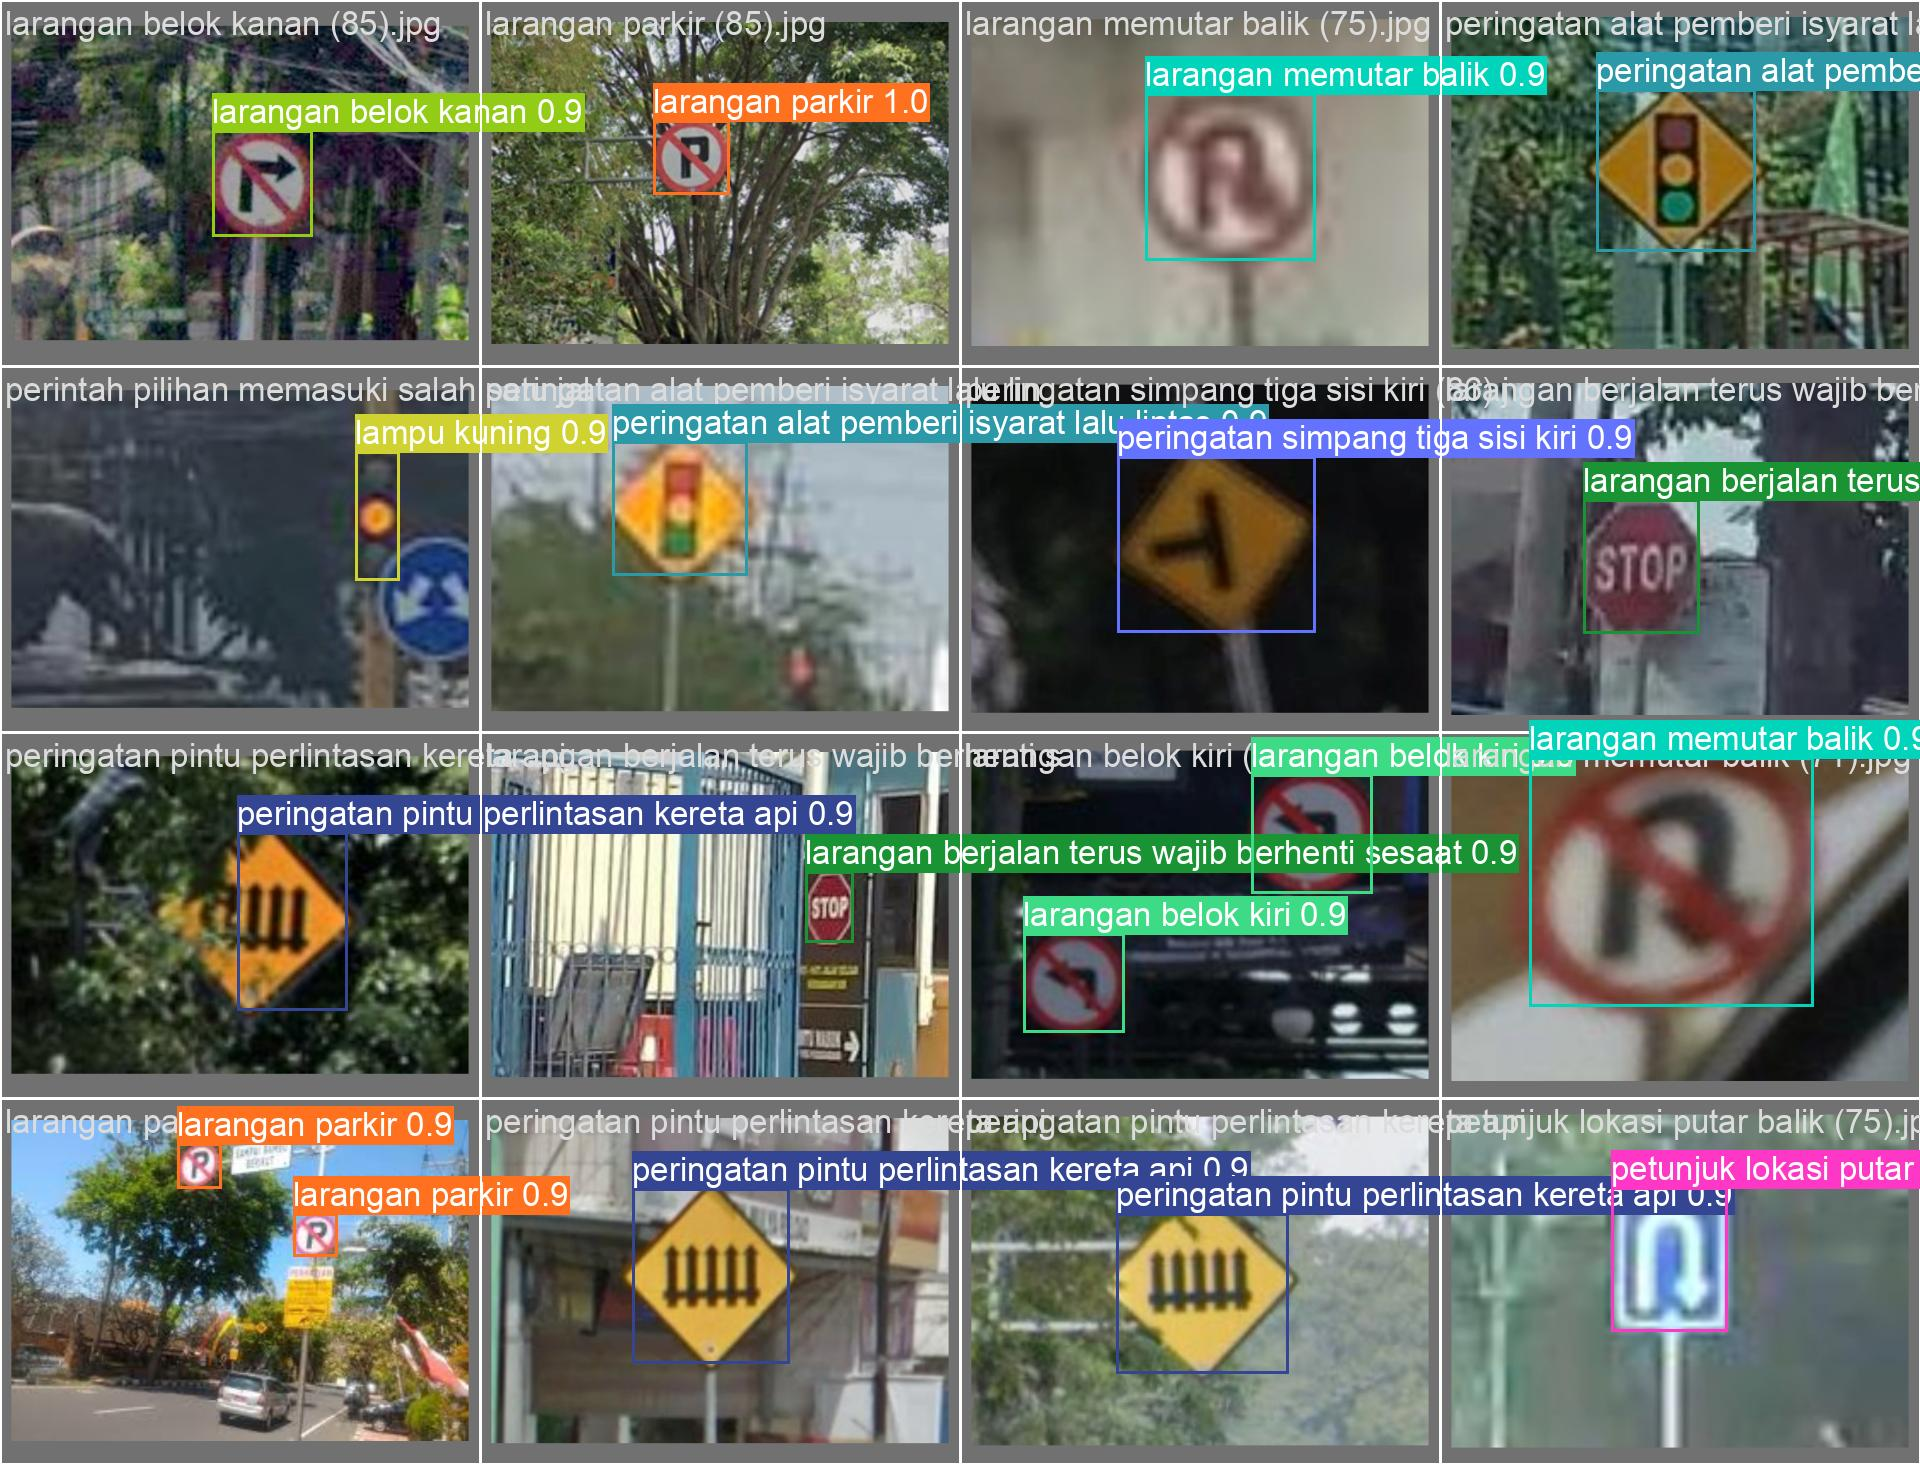

In [ ]:
Image(filename=f'runs/detect/train3/val_batch1_pred.jpg', width=1024)

### 6. Train with optimizer adam and lr 0.0001

In [ ]:
## auto
##model.train(data='./dataset.yaml', epochs=100, imgsz=640, device=0, batch=8)

## custom optim & lr
model.train(data='./dataset.yaml', epochs=100, imgsz=640, device=0, batch=8, optimizer='Adam', lr0=0.0001)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=./dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 108MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytic

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      4.08G     0.9672      2.387      1.223          6        640: 100%|██████████| 184/184 [00:48<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:25<00:00,  1.02s/it]

                   all        399        429      0.647      0.527      0.626      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.97G     0.8566      1.287      1.113         11        640: 100%|██████████| 184/184 [00:45<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.795      0.773      0.837       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      4.07G     0.8105      1.016      1.089          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.855      0.831      0.874      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      4.03G     0.7776     0.8752      1.063          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.891      0.889      0.926      0.775

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      4.07G     0.7611     0.7983      1.054          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.933      0.893      0.932      0.786

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      4.05G     0.7409     0.7423      1.055          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.915      0.888      0.943      0.784

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      4.05G     0.7342     0.7043      1.051          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.919      0.906      0.948      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      4.07G     0.7316     0.6802      1.037         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]

                   all        399        429      0.904      0.907       0.95        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      4.04G     0.7232     0.6417      1.039          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.931      0.912      0.933      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      4.04G     0.7072     0.6336      1.035          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.921       0.92      0.954      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      4.04G     0.6809     0.5999      1.014          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.923       0.91      0.951      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      4.05G     0.6849     0.5903      1.022         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.946      0.892      0.943      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      4.02G      0.701     0.6149      1.022          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.09it/s]


                   all        399        429      0.941      0.893       0.95      0.809

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      4.04G     0.6672     0.5906      1.025         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.932       0.92       0.95      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      4.05G     0.6765     0.5722      1.021          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        399        429      0.957      0.937      0.963      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      4.05G     0.6615     0.5577      1.011         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.88it/s]


                   all        399        429      0.915      0.909      0.942      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      4.05G     0.6545     0.5483      1.004          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.937      0.918       0.96      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      4.06G     0.6354     0.4991     0.9948         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.926      0.945      0.958      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      4.04G     0.6579     0.5219      1.015          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]

                   all        399        429      0.919      0.938      0.953      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      4.05G     0.6368      0.522      1.003          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]

                   all        399        429      0.945      0.926      0.959      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      4.05G     0.6185     0.4959     0.9894         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.926       0.95      0.964      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      4.06G     0.6374     0.5098      1.002         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.932      0.935      0.949      0.806

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      4.06G     0.6117     0.4843     0.9885         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429       0.95      0.936      0.963      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      4.03G     0.6077     0.4791     0.9792         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.934      0.931      0.962      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      4.03G     0.5979     0.4694     0.9888         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.954      0.949      0.966      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      4.05G     0.6028     0.4627     0.9795          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.948      0.929      0.962      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      4.04G     0.5906     0.4683     0.9709         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.943      0.935      0.958      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      4.03G     0.5983     0.4537     0.9708          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.939      0.933       0.96      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      4.05G     0.5935     0.4624     0.9805          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.938      0.939      0.962      0.811

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      4.05G     0.5918     0.4433     0.9723         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.955       0.92      0.956      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      4.06G     0.5879     0.4563     0.9741         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.944       0.91      0.959      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      4.02G      0.578     0.4402     0.9722         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.952      0.909       0.96      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      4.05G     0.5817     0.4525     0.9728         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.949      0.918      0.969      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      4.05G     0.5726     0.4307     0.9602         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.941      0.929      0.959       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      4.06G     0.5735     0.4284     0.9709         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.939      0.937      0.965      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      4.04G     0.5464     0.4052     0.9502         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429       0.97      0.924      0.963      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      4.03G     0.5447     0.3983     0.9488         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.949       0.92      0.958      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      4.05G     0.5568     0.4023     0.9606          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        399        429      0.947      0.933      0.968      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      4.03G     0.5355     0.4011       0.95         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429       0.95      0.929      0.962      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      4.05G       0.53     0.3853     0.9461         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.957      0.932      0.968      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      4.04G       0.54     0.3998      0.948         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.944      0.933      0.963      0.825

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      4.04G     0.5232     0.3712     0.9379         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.969      0.938      0.967      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      4.02G     0.5291     0.3799     0.9479          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.10it/s]


                   all        399        429      0.954      0.942      0.956      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      4.06G     0.5315     0.3998     0.9545         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.955      0.932      0.957      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      4.05G     0.5328     0.3937     0.9503         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.85it/s]

                   all        399        429      0.934      0.948      0.965      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      4.05G     0.5206     0.3765     0.9455         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.947       0.94      0.965      0.817

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      4.06G     0.5103     0.3677     0.9432         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.961      0.928      0.962      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      4.05G     0.5226     0.3737     0.9513         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.955      0.919       0.95      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      4.03G     0.4993     0.3582     0.9339          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.05it/s]


                   all        399        429      0.935      0.946      0.962      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      4.05G      0.507     0.3639     0.9458          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.02it/s]


                   all        399        429      0.953      0.944      0.967      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      4.05G      0.498     0.3606     0.9396         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.954      0.948      0.971      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      4.03G     0.4915     0.3499     0.9315          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.935      0.952       0.96      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      4.05G     0.4831     0.3422     0.9297         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.07it/s]


                   all        399        429      0.948      0.944      0.963      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      4.05G     0.4856     0.3444     0.9317         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.938      0.947      0.965      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      4.05G     0.4857     0.3527     0.9344         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.955      0.942      0.964      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      4.05G     0.4678     0.3327      0.921         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429       0.94       0.94      0.959      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      4.05G      0.472     0.3258     0.9303         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.966      0.938      0.966      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      4.03G     0.4818     0.3399     0.9373         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.947      0.948      0.966      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      4.05G     0.4636     0.3399     0.9244          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.939      0.947      0.963      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      4.05G     0.4717     0.3395     0.9276          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429       0.95      0.946      0.968       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      4.02G     0.4643     0.3342      0.915         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.08it/s]


                   all        399        429      0.957      0.943      0.968      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      4.05G     0.4603     0.3245     0.9248         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]

                   all        399        429      0.961      0.943      0.965      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      4.05G     0.4445     0.3156     0.9169         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429      0.945      0.949      0.964      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      4.03G     0.4682     0.3237     0.9261          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.971      0.933      0.965      0.828

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      4.05G     0.4564     0.3219     0.9211         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.973      0.928      0.959      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      4.06G       0.45      0.315     0.9184          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.947      0.942      0.963       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      4.03G      0.433     0.3057       0.91          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429      0.959      0.938      0.965      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      4.05G     0.4305     0.3094     0.9097         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.965      0.935       0.96      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      4.04G     0.4323     0.3062     0.9095         16        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.90it/s]


                   all        399        429      0.961      0.931      0.959      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      4.03G     0.4325     0.3119     0.9094         15        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.961      0.932      0.964      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      4.04G      0.437     0.3069     0.9143         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  5.00it/s]


                   all        399        429      0.959      0.934      0.966      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      4.05G     0.4185     0.2946     0.9035         17        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.98it/s]


                   all        399        429       0.95       0.94      0.957       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      4.03G     0.4225     0.2983     0.9058         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.97it/s]


                   all        399        429      0.962      0.942      0.966      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      4.05G     0.4077     0.2884      0.898         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.957      0.938       0.96      0.829

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      4.05G     0.4111     0.3001     0.9062          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.937      0.939      0.956      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      4.06G     0.4142     0.2937     0.9098         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.941      0.946      0.963      0.826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      4.05G     0.4012     0.2764     0.9035         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.99it/s]


                   all        399        429      0.961      0.936      0.968       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      4.04G      0.414     0.2985     0.9024         12        640: 100%|██████████| 184/184 [00:47<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429       0.96      0.946       0.97      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      4.06G     0.4175     0.2876     0.9091         10        640: 100%|██████████| 184/184 [00:46<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.959      0.944      0.967      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      4.05G     0.4127     0.2822     0.9045         12        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.00it/s]


                   all        399        429      0.969      0.934      0.968      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      4.05G     0.3999     0.2809     0.8982          6        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.956      0.947      0.967      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      4.02G     0.3948      0.277     0.9045         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.83it/s]


                   all        399        429      0.964      0.941      0.968      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      4.05G     0.3903     0.2797     0.9001          8        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429       0.95      0.947      0.971      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      4.06G     0.3954     0.2762     0.9027         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.965      0.936       0.97      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      4.06G     0.3848      0.274     0.8957          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.96it/s]


                   all        399        429       0.96      0.942      0.969      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      4.04G     0.3898     0.2711      0.898          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.962      0.939      0.967       0.83

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.02G      0.394     0.2809     0.9064          9        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.89it/s]

                   all        399        429      0.946      0.945      0.963      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.04G     0.3912       0.27     0.8985         14        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.957      0.942      0.965      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.05G     0.3814     0.2704     0.8936         13        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.963      0.939      0.967      0.834

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.04G     0.3917     0.2685     0.8963         11        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.04it/s]


                   all        399        429      0.957      0.938      0.966      0.831
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.03G     0.3161     0.1728     0.8238          5        640: 100%|██████████| 184/184 [00:47<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.93it/s]


                   all        399        429      0.938      0.952      0.962      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.05G     0.3022     0.1695     0.8134          7        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.94it/s]


                   all        399        429      0.939      0.949      0.964      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.05G     0.2936     0.1619     0.8098          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.87it/s]


                   all        399        429      0.946      0.936      0.962      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.04G     0.2973     0.1648     0.8153          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.95it/s]


                   all        399        429      0.952      0.936      0.962      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.05G     0.2959     0.1631     0.8108          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.06it/s]


                   all        399        429      0.959      0.936      0.965      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.03G     0.2847     0.1609     0.8176          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.03it/s]


                   all        399        429      0.954      0.938      0.964      0.833

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.05G     0.2866     0.1562     0.8137          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:04<00:00,  5.01it/s]


                   all        399        429      0.958      0.936      0.966      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.05G     0.2828     0.1573      0.808          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.76it/s]

                   all        399        429      0.952      0.942      0.966      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.03G     0.2754     0.1541     0.8044          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.86it/s]


                   all        399        429      0.951      0.942      0.965      0.835

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.05G     0.2797     0.1531      0.807          5        640: 100%|██████████| 184/184 [00:46<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:05<00:00,  4.92it/s]


                   all        399        429      0.947      0.946      0.965      0.837

100 epochs completed in 1.484 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 52.1MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 52.1MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:06<00:00,  3.99it/s]


                   all        399        429      0.952      0.942      0.966      0.838
     larangan berhenti         19         19      0.977          1      0.995      0.934
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.983          1      0.995      0.934
       larangan parkir         19         20          1      0.885      0.988      0.895
           lampu hijau         19         35          1      0.849      0.977      0.763
          lampu kuning         19         19      0.764      0.789      0.869      0.634
           lampu merah         19         19      0.717      0.667      0.712      0.568
  larangan belok kanan         19         20      0.926        0.9      0.972       0.92
   larangan belok kiri         19         23       0.92          1      0.993       0.89
larangan berjalan terus wajib berhenti sesaat         19         23      0.956      0.946      0.967      0.798
larangan memutar balik         19         19        

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ad27e51ee00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
model = YOLO("runs/detect/train4/weights/best.pt")

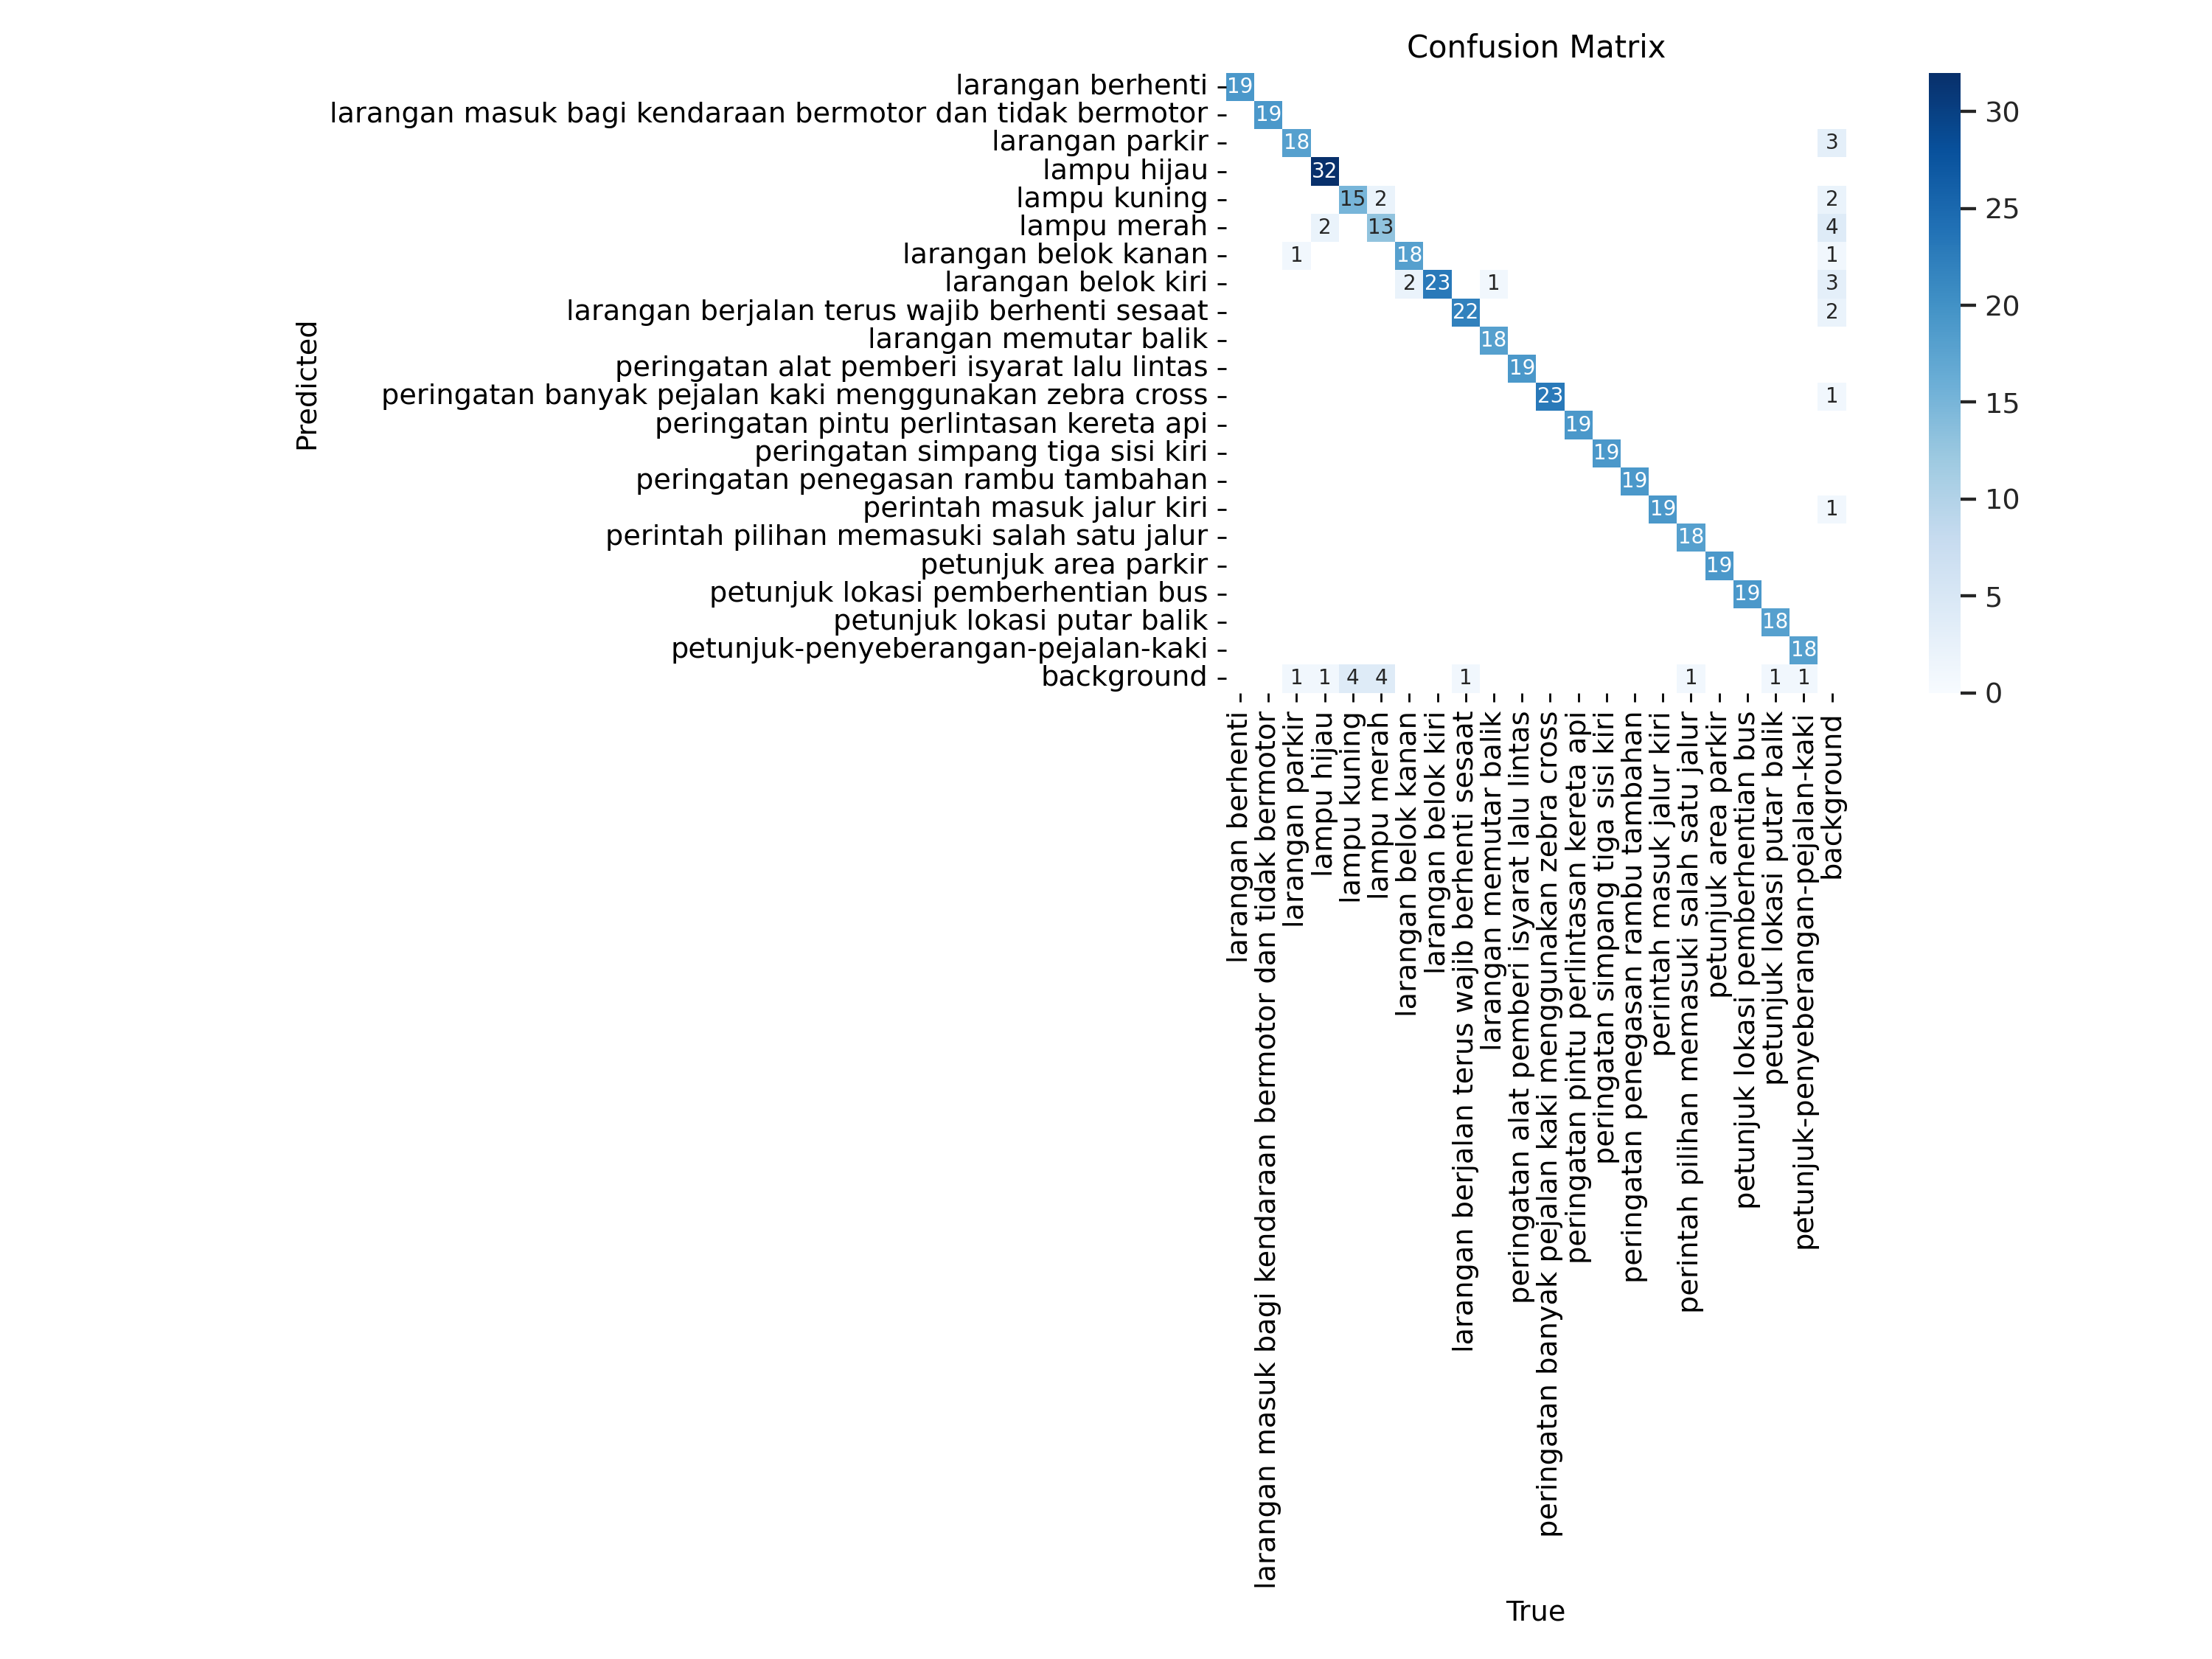

In [ ]:
Image(filename='runs/detect/train4/confusion_matrix.png', width=800)

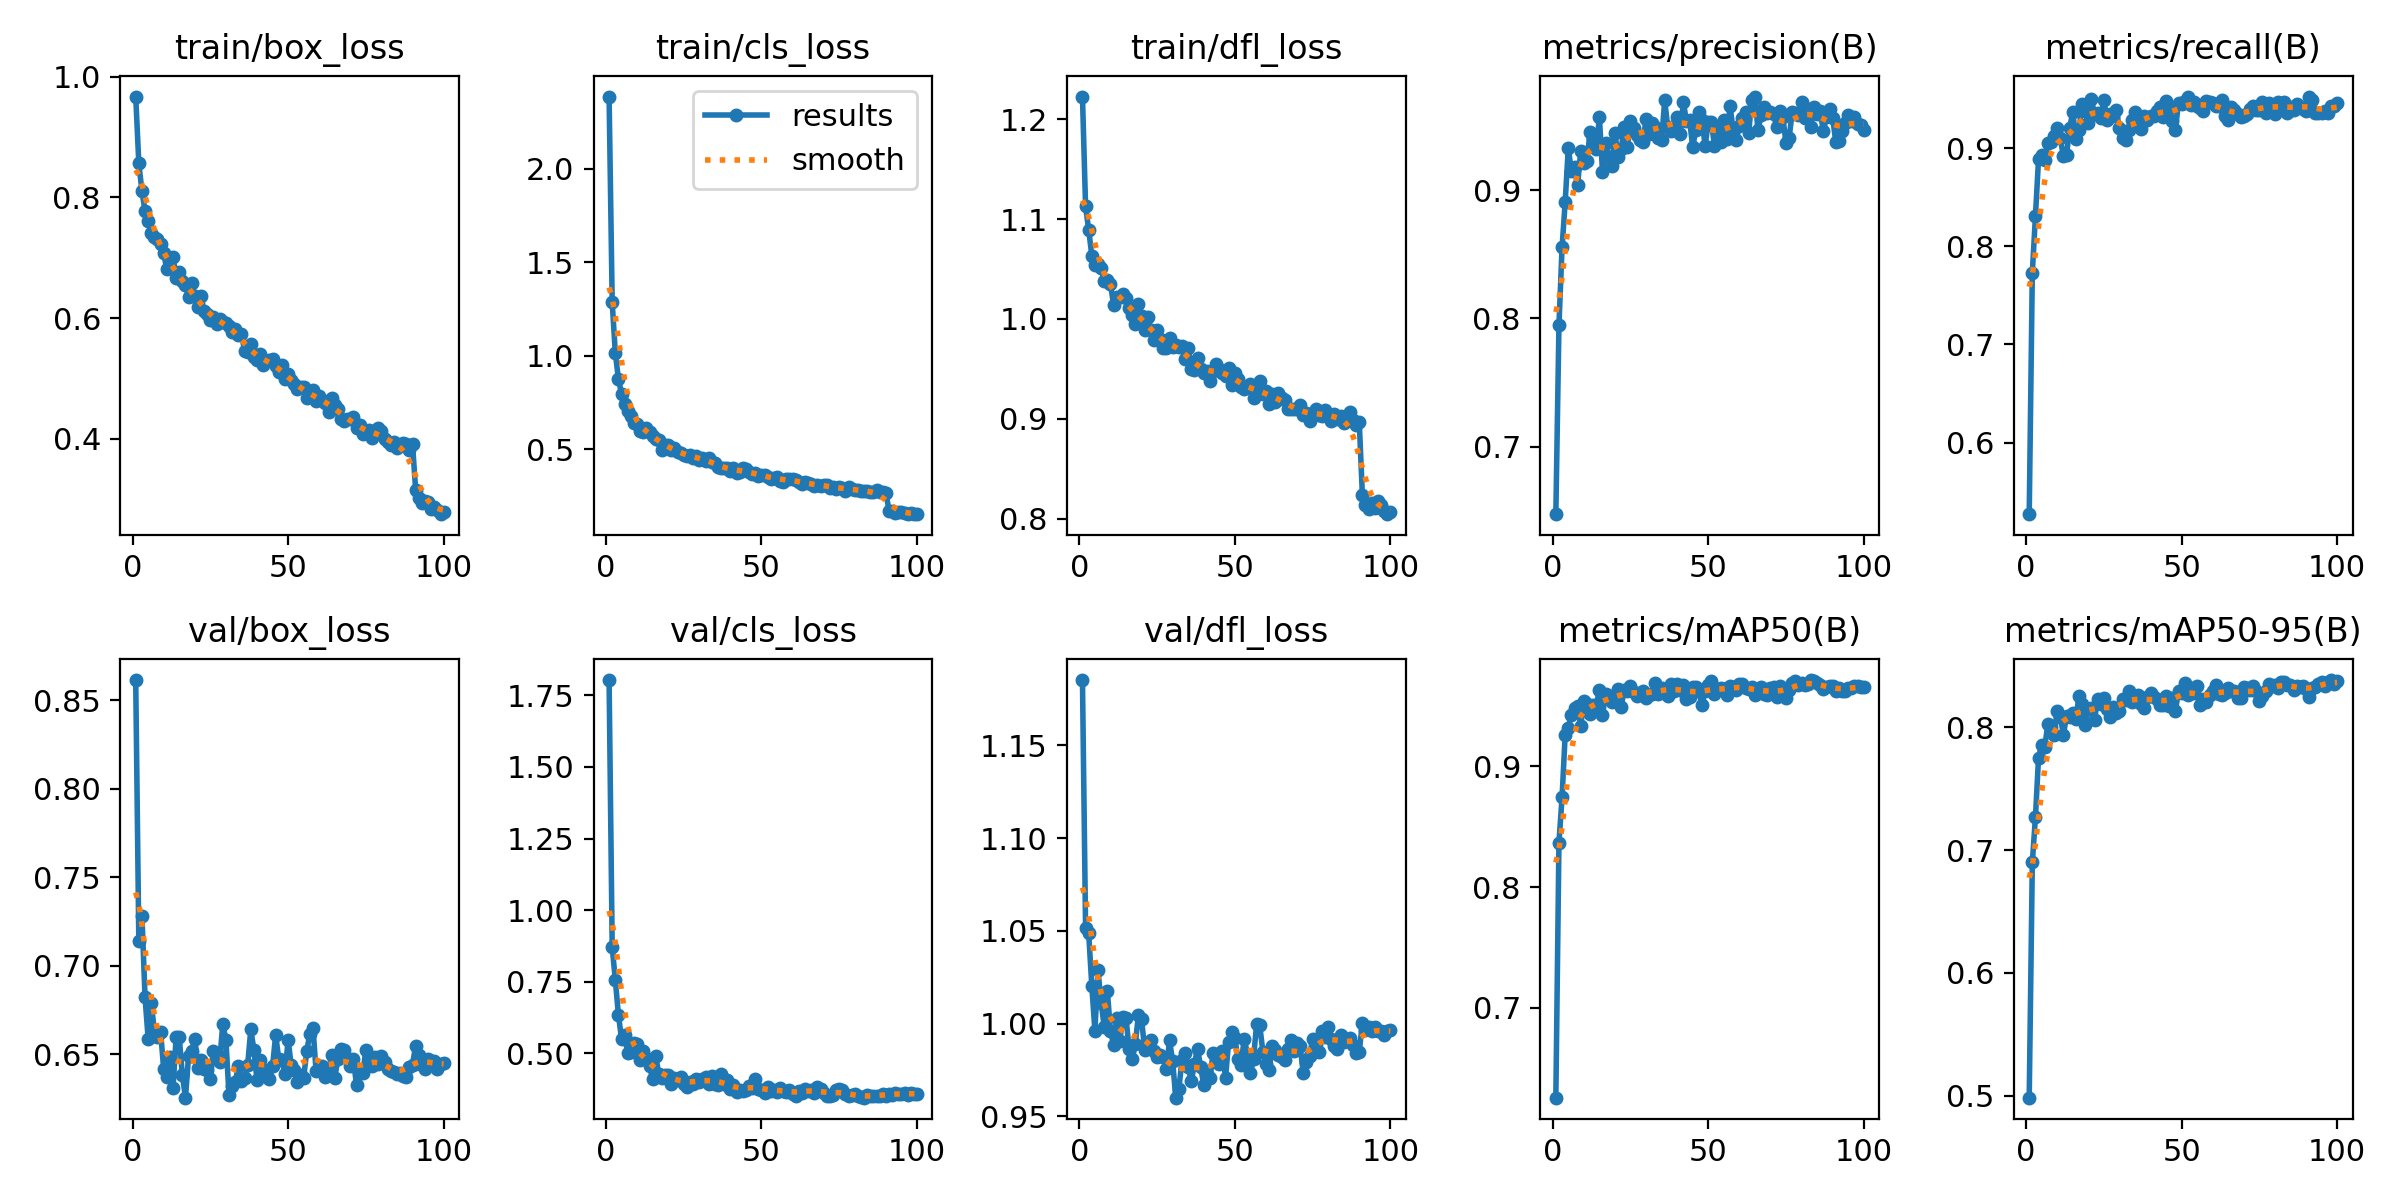

In [ ]:
Image(filename='runs/detect/train4/results.png')


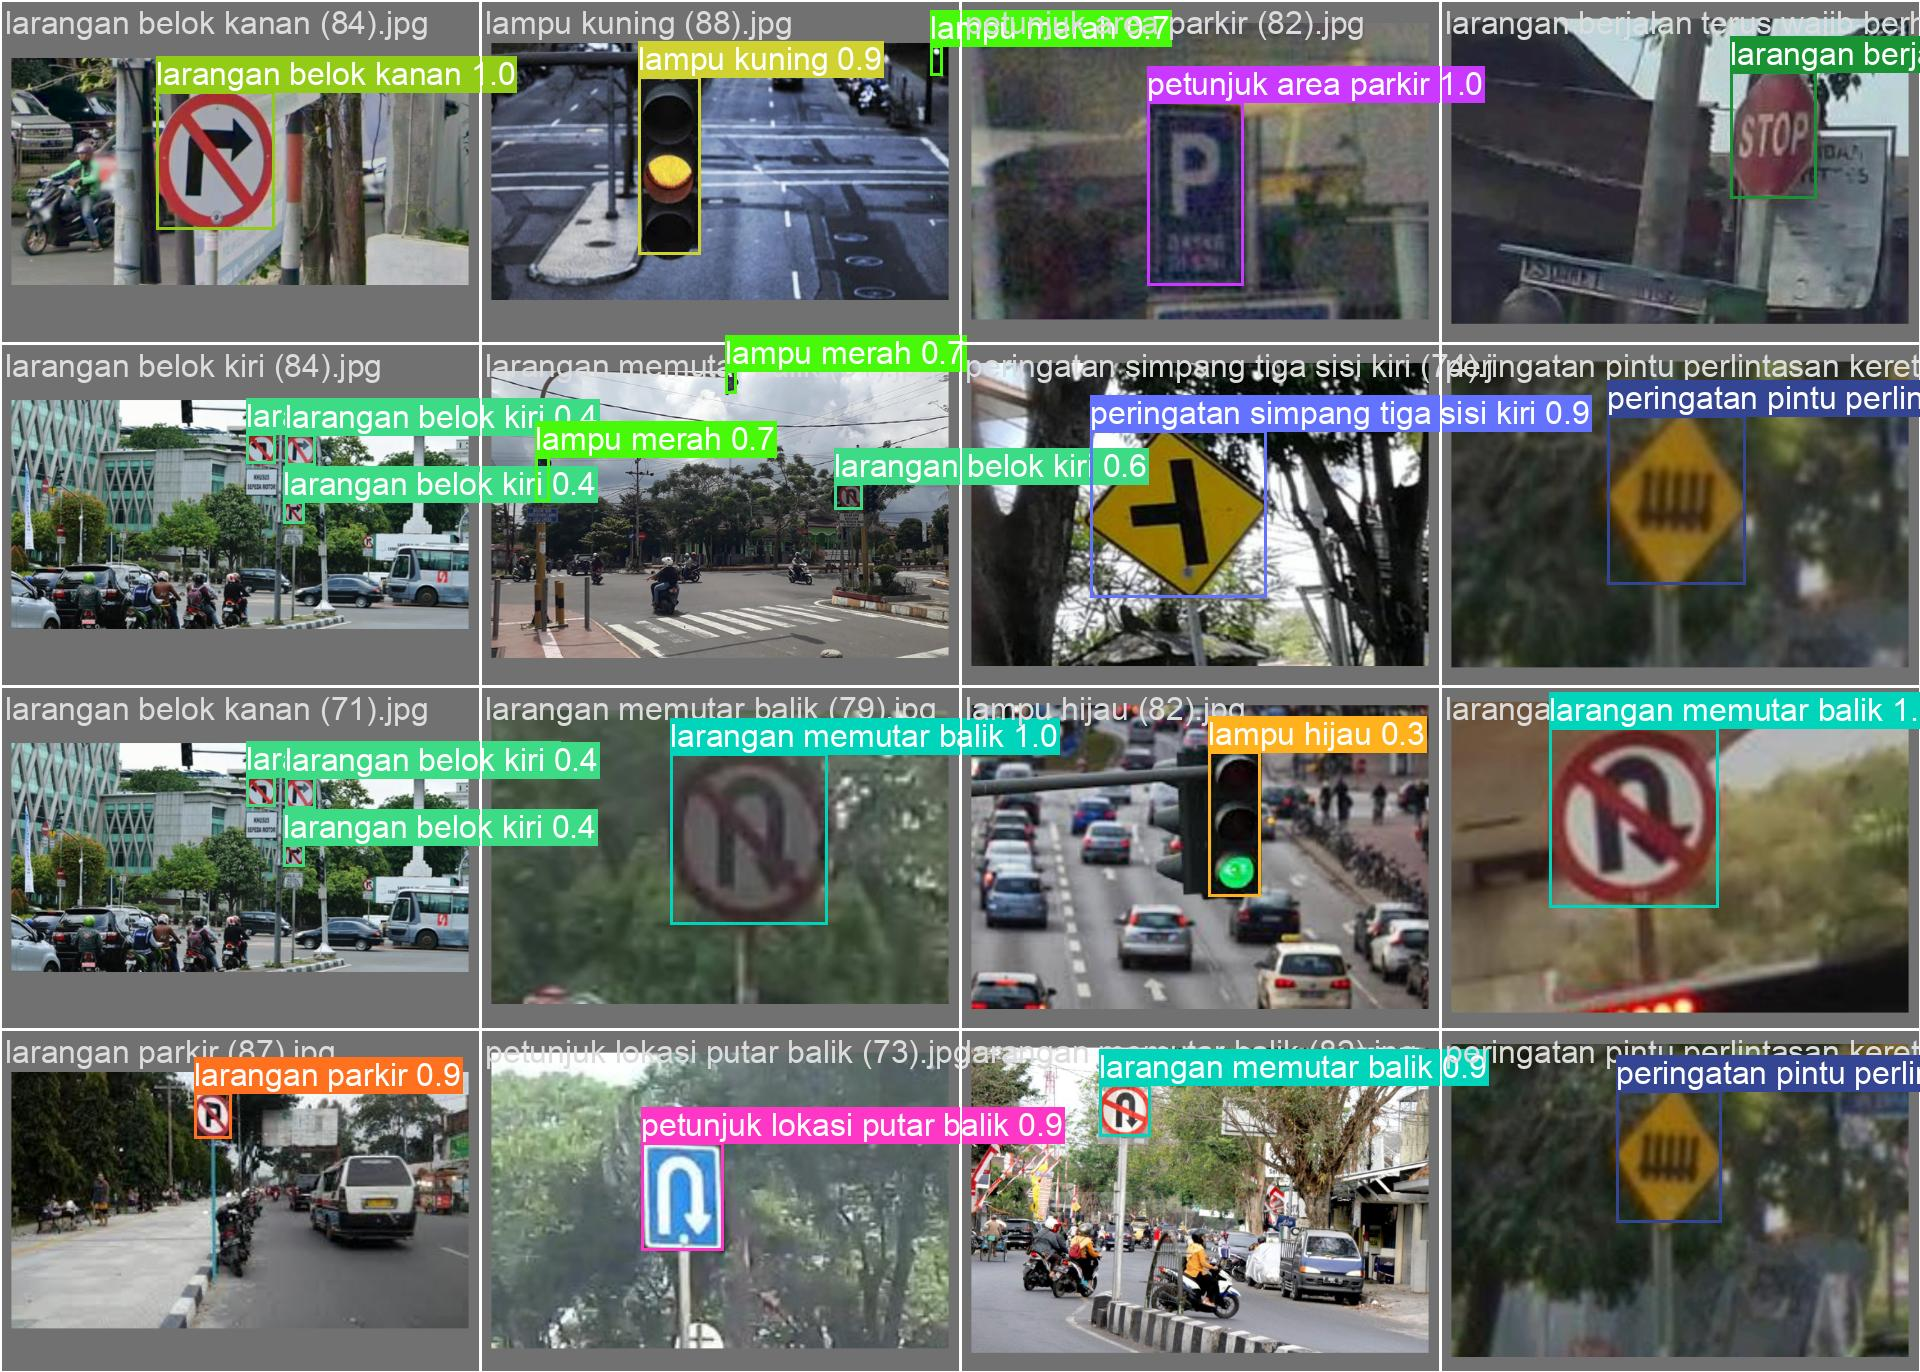

In [ ]:
Image(filename=f'runs/detect/train4/val_batch0_pred.jpg', width=1024)


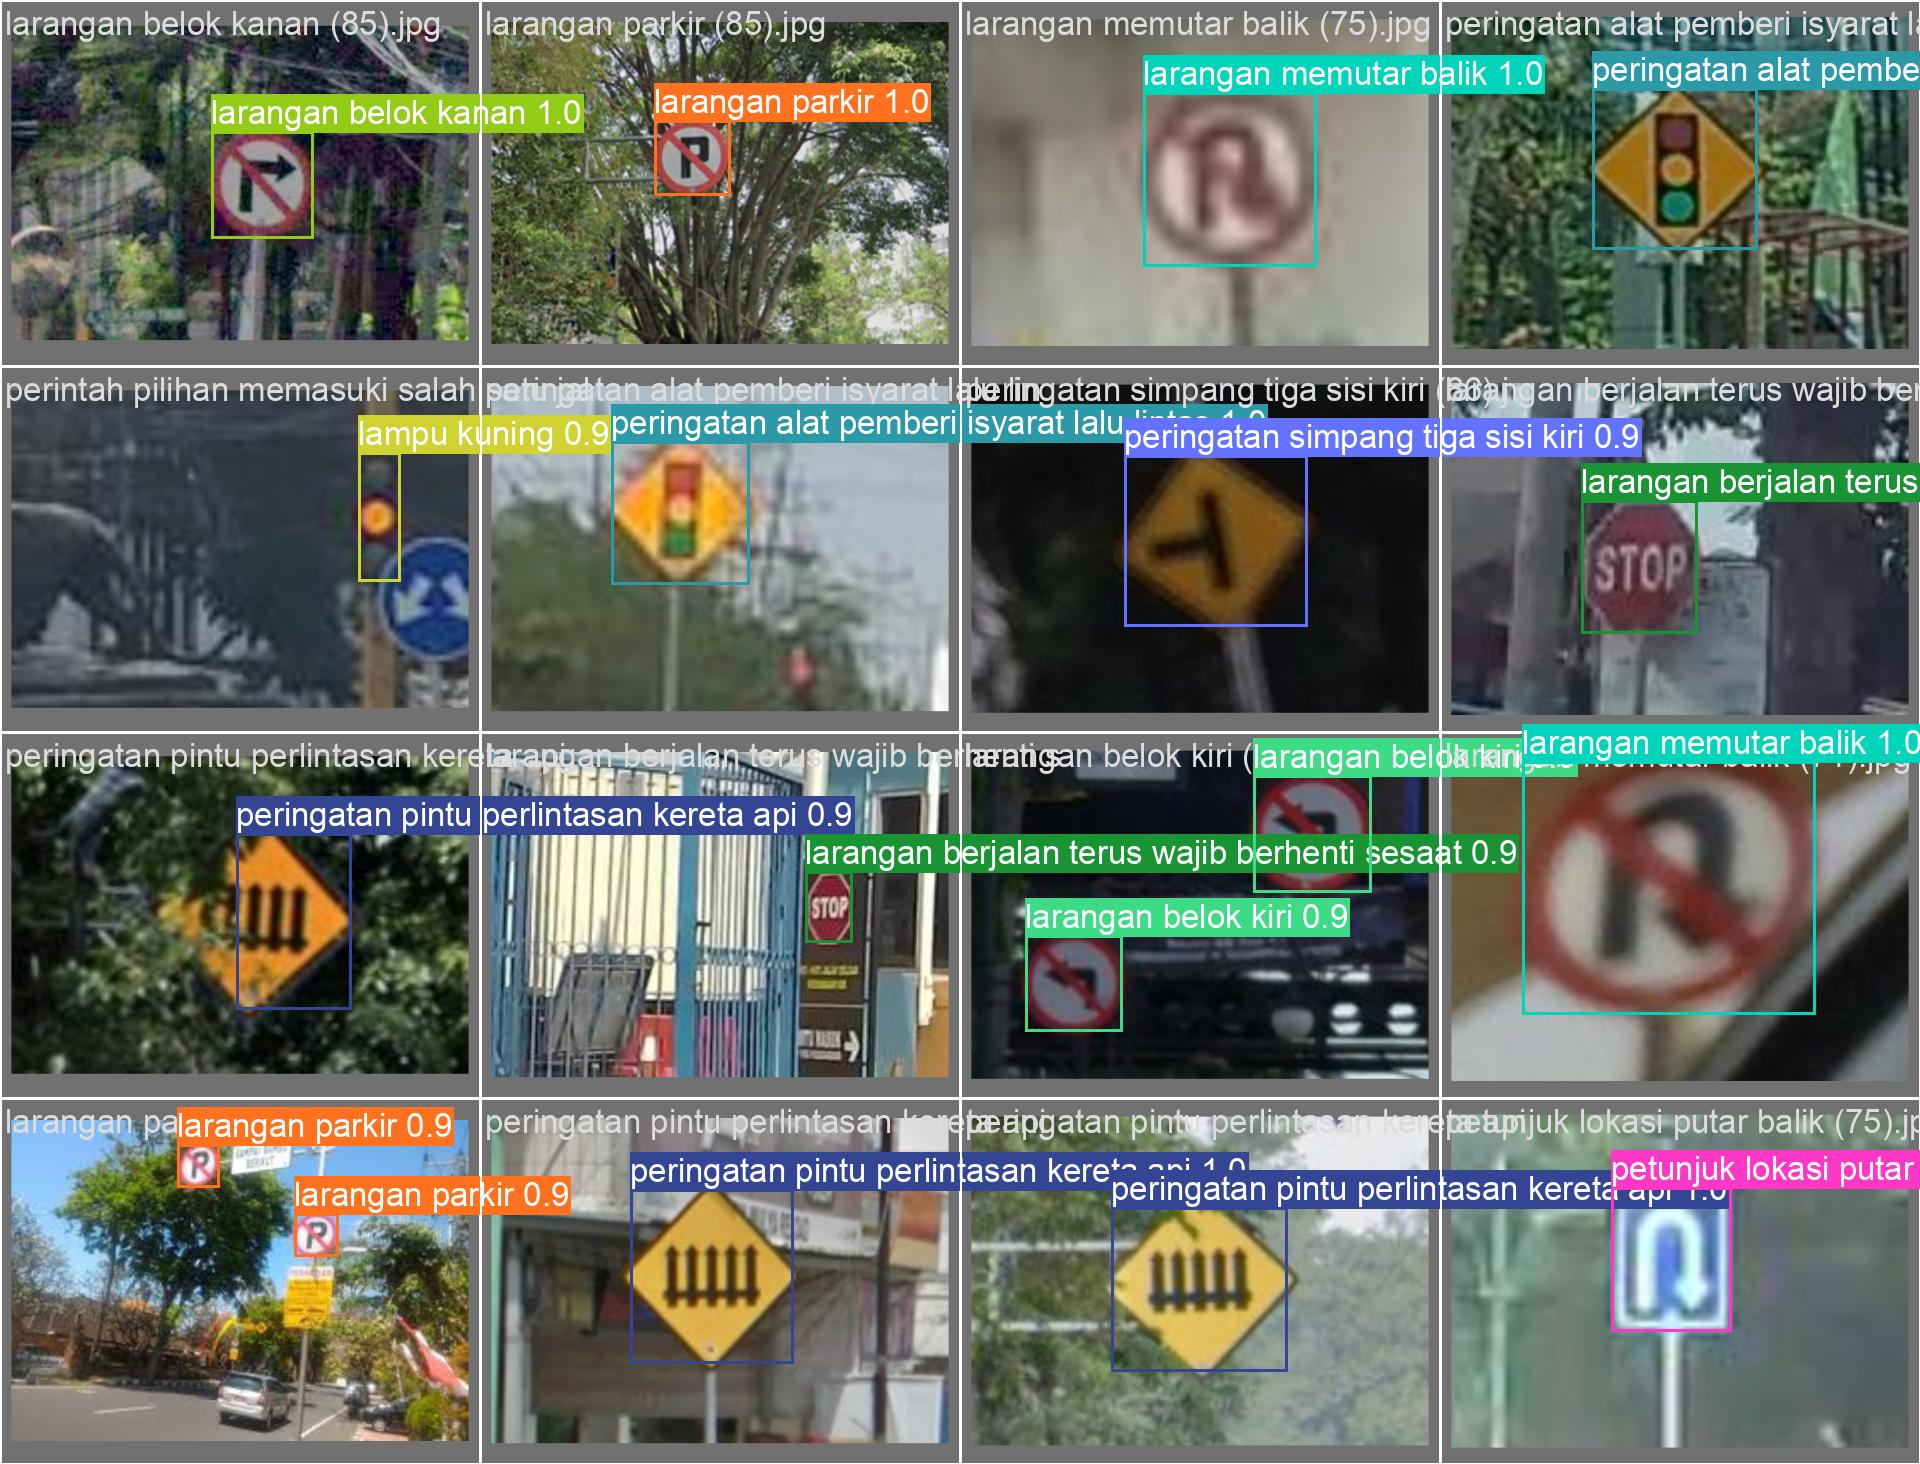

In [ ]:
Image(filename=f'runs/detect/train4/val_batch1_pred.jpg', width=1024)

### 7. Calculate mAP with Test Dataset for Auto and batch 100


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"
model = YOLO("runs/detect/train3/weights/best-8m-ep100-auto.pt")
# Run validation on a set specified as 'val' argument
metrics = model.val(data='./dataset.yaml')


/content/drive/MyDrive/Colab Notebooks/Detect Rambu
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.11MB/s]
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/test... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:26<00:00,  8.72it/s]

val: New cache created: /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  1.93it/s]


                   all        231        242      0.949      0.962      0.985      0.851
     larangan berhenti         11         11      0.909       0.91       0.98      0.821
larangan masuk bagi kendaraan bermotor dan tidak bermotor         11         11      0.976          1      0.995      0.936
       larangan parkir         11         14          1      0.815      0.977      0.814
           lampu hijau         11         12      0.939          1      0.995      0.834
          lampu kuning         11         11      0.698      0.843       0.92      0.731
           lampu merah         11         16      0.977      0.625      0.898      0.567
  larangan belok kanan         11         11      0.977          1      0.995      0.936
   larangan belok kiri         11         11      0.966          1      0.995      0.927
larangan berjalan terus wajib berhenti sesaat         11         11      0.977          1      0.995      0.867
larangan memutar balik         11         11      0.

In [ ]:
metrics.results_dict

{'metrics/precision(B)': 0.9491482020800297,
 'metrics/recall(B)': 0.9615635101082147,
 'metrics/mAP50(B)': 0.9851834126614085,
 'metrics/mAP50-95(B)': 0.8508758712235577,
 'fitness': 0.8643066253673428}

### 8. Calculate mAP with Test Dataset for Adam and LR 0.0001 and batch 100

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"
model = YOLO("runs/detect/train4/weights/best.pt")
# Run validation on a set specified as 'val' argument
metrics = model.val(data='./dataset.yaml')

/content/drive/MyDrive/Colab Notebooks/Detect Rambu
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/test.cache... 231 images, 0 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:07<00:00,  2.05it/s]


                   all        231        242      0.969      0.953      0.981      0.856
     larangan berhenti         11         11      0.977      0.909      0.929      0.844
larangan masuk bagi kendaraan bermotor dan tidak bermotor         11         11      0.982          1      0.995      0.966
       larangan parkir         11         14      0.962      0.786      0.981       0.87
           lampu hijau         11         12       0.96          1      0.995      0.806
          lampu kuning         11         11      0.885      0.699       0.93      0.667
           lampu merah         11         16      0.966      0.625      0.865      0.553
  larangan belok kanan         11         11       0.98          1      0.995      0.944
   larangan belok kiri         11         11      0.973          1      0.995      0.916
larangan berjalan terus wajib berhenti sesaat         11         11          1          1      0.995      0.864
larangan memutar balik         11         11      0.

In [ ]:
metrics.results_dict

{'metrics/precision(B)': 0.9685065576964218,
 'metrics/recall(B)': 0.9532795289629883,
 'metrics/mAP50(B)': 0.9811795538768868,
 'metrics/mAP50-95(B)': 0.8564477107183178,
 'fitness': 0.8689208950341747}

### Using yolov8n

In [ ]:
%cd "/content"

/content


In [ ]:
!wget https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
#!wget -q https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt
#https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt
!wget -q https://github.com/ultralytics/assets/releases/download/v8.1.0/yolov8n.pt

In [ ]:
model = YOLO("yolov8n.pt")

In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
model.train(data='./dataset.yaml', epochs=100,imgsz=640, device=0, batch=8 )

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=./dataset.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 755k/755k [00:00<00:00, 15.1MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/train.cache... 1469 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1469/1469 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/Detect Rambu/labels/val.cache... 399 images, 0 backgrounds, 0 corrupt: 100%|██████████| 399/399 [00:00<?, ?it/s]


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.25G     0.9645      3.921      1.195          6        640: 100%|██████████| 184/184 [00:20<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  68%|██████▊   | 17/25 [00:03<00:01,  4.09it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:08<00:00,  2.97it/s]

                   all        399        429      0.247      0.538      0.318      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.25G     0.9423      2.772      1.157         11        640: 100%|██████████| 184/184 [00:17<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.36it/s]

                   all        399        429      0.447      0.699      0.617      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.25G     0.9088      2.272       1.13          9        640: 100%|██████████| 184/184 [00:16<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.40it/s]

                   all        399        429      0.664      0.752      0.747      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.24G      0.882      1.952      1.093          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.78it/s]

                   all        399        429       0.79      0.705       0.79      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.25G     0.8649        1.7      1.081          6        640: 100%|██████████| 184/184 [00:16<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.01it/s]


                   all        399        429      0.829      0.839      0.868       0.71

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.25G     0.8272      1.518      1.069          7        640: 100%|██████████| 184/184 [00:16<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.15it/s]

                   all        399        429      0.823      0.837      0.882      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.25G     0.8188      1.407      1.061          7        640: 100%|██████████| 184/184 [00:16<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.23it/s]


                   all        399        429      0.882      0.847      0.909      0.737

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.25G     0.7994      1.306      1.047         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.08it/s]


                   all        399        429      0.883      0.868      0.914      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.25G     0.7841      1.202      1.036          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.02it/s]

                   all        399        429      0.891      0.893      0.929      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.25G     0.7738      1.126      1.034          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.61it/s]

                   all        399        429       0.94      0.886      0.944      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.25G      0.764      1.102      1.023          6        640: 100%|██████████| 184/184 [00:17<00:00, 10.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.98it/s]


                   all        399        429      0.935       0.87      0.929      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.25G      0.753      1.016      1.024         15        640: 100%|██████████| 184/184 [00:16<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.08it/s]

                   all        399        429       0.94       0.87      0.945       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.24G     0.7622      1.002       1.02          7        640: 100%|██████████| 184/184 [00:16<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.38it/s]

                   all        399        429      0.919      0.898       0.94      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.25G     0.7443     0.9739      1.021         16        640: 100%|██████████| 184/184 [00:16<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.22it/s]

                   all        399        429      0.914      0.899      0.939       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.25G     0.7359     0.9322      1.017          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.21it/s]


                   all        399        429       0.92      0.897      0.943      0.793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.25G     0.7367     0.8954      1.008         10        640: 100%|██████████| 184/184 [00:16<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.96it/s]

                   all        399        429      0.924      0.918      0.947      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.25G     0.7286     0.8711      1.009          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.93it/s]

                   all        399        429       0.93       0.89      0.943      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.25G     0.7143     0.7991      1.002         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.78it/s]

                   all        399        429      0.932      0.919      0.949      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.24G     0.7209     0.7798      1.002          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.82it/s]


                   all        399        429      0.938      0.891      0.946      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.25G     0.7134     0.7708     0.9983          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.37it/s]

                   all        399        429      0.948      0.901      0.951      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.25G     0.6894     0.7471     0.9844         14        640: 100%|██████████| 184/184 [00:17<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.38it/s]

                   all        399        429      0.918       0.93       0.95      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.25G     0.7012     0.7443     0.9996         15        640: 100%|██████████| 184/184 [00:16<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.47it/s]

                   all        399        429      0.949      0.897      0.947      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.25G     0.6832     0.7105     0.9944         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.28it/s]


                   all        399        429      0.914      0.926      0.952      0.792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.24G     0.6919     0.6886     0.9868         13        640: 100%|██████████| 184/184 [00:16<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.25it/s]


                   all        399        429       0.95      0.922      0.958      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.24G     0.6865     0.6945     0.9878         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.19it/s]

                   all        399        429      0.956      0.921      0.951      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.25G     0.6805     0.6755     0.9827          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.71it/s]

                   all        399        429      0.964      0.916       0.96      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.25G     0.6645     0.6634     0.9708         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.53it/s]

                   all        399        429       0.94      0.924       0.96       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.25G     0.6759     0.6537     0.9839          7        640: 100%|██████████| 184/184 [00:16<00:00, 10.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.08it/s]

                   all        399        429      0.975      0.928      0.968      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.25G     0.6695     0.6578     0.9879          8        640: 100%|██████████| 184/184 [00:16<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.26it/s]


                   all        399        429      0.934      0.928      0.963      0.807

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.25G     0.6688     0.6228     0.9798         15        640: 100%|██████████| 184/184 [00:16<00:00, 10.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.33it/s]

                   all        399        429      0.921      0.912      0.945      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.25G     0.6609     0.6363     0.9749         12        640: 100%|██████████| 184/184 [00:17<00:00, 10.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.31it/s]


                   all        399        429       0.94      0.896      0.958      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.24G     0.6573     0.6062     0.9758         14        640: 100%|██████████| 184/184 [00:17<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.10it/s]


                   all        399        429      0.964      0.932      0.967      0.808

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.25G     0.6556     0.6109     0.9783         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.04it/s]


                   all        399        429      0.963      0.924      0.963      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.25G     0.6476     0.5864      0.968         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.49it/s]

                   all        399        429      0.946      0.928      0.964      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      1.25G     0.6552     0.5851     0.9721         17        640: 100%|██████████| 184/184 [00:16<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.62it/s]


                   all        399        429      0.952      0.906       0.95      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.25G     0.6351     0.5606     0.9599         10        640: 100%|██████████| 184/184 [00:16<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.21it/s]

                   all        399        429      0.949      0.923      0.956      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.25G     0.6305     0.5614      0.962         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.31it/s]


                   all        399        429      0.935      0.933      0.954      0.804

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.25G     0.6428     0.5595     0.9721          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.31it/s]


                   all        399        429      0.948       0.94      0.964      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.24G     0.6304     0.5554      0.968         11        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.22it/s]


                   all        399        429      0.957       0.93      0.963      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.25G     0.6355     0.5415     0.9657         11        640: 100%|██████████| 184/184 [00:16<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.33it/s]

                   all        399        429      0.951       0.93      0.963      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.24G     0.6348     0.5463     0.9686         15        640: 100%|██████████| 184/184 [00:17<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.97it/s]


                   all        399        429      0.962      0.931      0.963      0.805

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.25G      0.614     0.5203      0.954         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.70it/s]


                   all        399        429      0.958      0.925      0.963      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.24G     0.6157     0.5151     0.9575          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.56it/s]

                   all        399        429      0.953      0.933      0.969      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.25G     0.6233       0.52     0.9624         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.85it/s]

                   all        399        429      0.978      0.923      0.971      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.25G      0.635     0.5277     0.9661         10        640: 100%|██████████| 184/184 [00:16<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.37it/s]


                   all        399        429      0.957      0.947       0.97      0.822

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.25G     0.6082     0.5119     0.9575         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.32it/s]

                   all        399        429      0.929      0.939      0.961      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      1.25G     0.6004     0.4945     0.9504         17        640: 100%|██████████| 184/184 [00:16<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.53it/s]

                   all        399        429      0.957      0.908      0.955      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.25G     0.6062     0.4944     0.9623         13        640: 100%|██████████| 184/184 [00:16<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.19it/s]

                   all        399        429      0.947       0.93      0.964      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.25G     0.6034     0.4808     0.9466          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.72it/s]

                   all        399        429      0.949      0.934      0.963      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.25G     0.5996     0.4927     0.9592          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.67it/s]

                   all        399        429       0.96      0.927      0.966      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.25G      0.599      0.488     0.9464         15        640: 100%|██████████| 184/184 [00:17<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.41it/s]


                   all        399        429      0.951      0.937      0.958      0.812

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.25G     0.5909      0.478      0.947          6        640: 100%|██████████| 184/184 [00:16<00:00, 10.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.15it/s]


                   all        399        429      0.962       0.95      0.966      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.25G     0.5858     0.4705     0.9428         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.34it/s]

                   all        399        429      0.943      0.944      0.967      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.25G      0.587     0.4694     0.9443         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.41it/s]


                   all        399        429      0.946      0.932       0.96      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.25G     0.5904     0.4734      0.945         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.94it/s]

                   all        399        429      0.952      0.933      0.959      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.25G     0.5737     0.4552     0.9374         15        640: 100%|██████████| 184/184 [00:16<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.25it/s]

                   all        399        429      0.943      0.932      0.961      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.25G     0.5745     0.4473      0.951         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.84it/s]


                   all        399        429      0.951      0.936      0.964      0.818

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.24G     0.5811     0.4641     0.9467         12        640: 100%|██████████| 184/184 [00:16<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.69it/s]

                   all        399        429      0.948       0.94      0.966      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.25G     0.5729     0.4608      0.937          5        640: 100%|██████████| 184/184 [00:16<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.82it/s]


                   all        399        429      0.956      0.924      0.957      0.814

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.25G     0.5829     0.4655     0.9398          9        640: 100%|██████████| 184/184 [00:16<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.34it/s]

                   all        399        429       0.96      0.916      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.24G     0.5666     0.4423     0.9311         11        640: 100%|██████████| 184/184 [00:17<00:00, 10.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.66it/s]

                   all        399        429      0.964      0.917      0.958      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.25G     0.5645     0.4471     0.9394         16        640: 100%|██████████| 184/184 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.32it/s]


                   all        399        429      0.961      0.929      0.961       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.25G     0.5495     0.4333     0.9304         13        640: 100%|██████████| 184/184 [00:16<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.30it/s]

                   all        399        429      0.945      0.929      0.958      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.25G     0.5732      0.432     0.9395          9        640: 100%|██████████| 184/184 [00:16<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.00it/s]

                   all        399        429      0.955      0.926      0.952      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.25G     0.5496     0.4259     0.9277         12        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.68it/s]

                   all        399        429      0.961      0.937      0.957      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.24G     0.5542     0.4278     0.9302          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.71it/s]

                   all        399        429      0.953      0.938      0.964      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.25G      0.541     0.4261     0.9319          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.29it/s]

                   all        399        429      0.965       0.93      0.954      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      1.25G     0.5354     0.4126     0.9231         12        640: 100%|██████████| 184/184 [00:16<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.30it/s]

                   all        399        429       0.97      0.931       0.96      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.24G     0.5388     0.4117      0.922         16        640: 100%|██████████| 184/184 [00:16<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.50it/s]

                   all        399        429      0.957      0.929      0.956      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.24G     0.5402     0.4226     0.9269         15        640: 100%|██████████| 184/184 [00:16<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.39it/s]

                   all        399        429      0.973      0.931      0.965      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.25G     0.5367     0.4162     0.9286         10        640: 100%|██████████| 184/184 [00:17<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.48it/s]

                   all        399        429      0.965      0.939      0.963      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.25G     0.5269      0.406     0.9243         17        640: 100%|██████████| 184/184 [00:17<00:00, 10.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.79it/s]

                   all        399        429      0.967      0.939       0.96      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.24G     0.5379     0.4099     0.9269         11        640: 100%|██████████| 184/184 [00:16<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.76it/s]


                   all        399        429      0.976       0.93       0.96       0.82

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.25G     0.5173     0.3917     0.9154         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.98it/s]


                   all        399        429      0.962       0.93      0.958      0.823

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      1.25G     0.5211     0.4027     0.9208          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.46it/s]

                   all        399        429      0.968      0.933      0.962      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.25G     0.5216     0.4041     0.9251         13        640: 100%|██████████| 184/184 [00:16<00:00, 11.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.44it/s]

                   all        399        429      0.956      0.931      0.962      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.25G     0.5044     0.3834     0.9165         11        640: 100%|██████████| 184/184 [00:16<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.35it/s]

                   all        399        429      0.962      0.923       0.96      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.25G     0.5231     0.3983     0.9137         12        640: 100%|██████████| 184/184 [00:16<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.28it/s]

                   all        399        429      0.961      0.929      0.957      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.25G     0.5158     0.3879      0.919         10        640: 100%|██████████| 184/184 [00:16<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.47it/s]

                   all        399        429      0.963      0.942      0.962      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.25G     0.5214     0.3802     0.9217         12        640: 100%|██████████| 184/184 [00:16<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.00it/s]


                   all        399        429      0.967      0.929      0.959      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.25G     0.5141     0.3883     0.9146          6        640: 100%|██████████| 184/184 [00:16<00:00, 11.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.54it/s]

                   all        399        429      0.959      0.937      0.964      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.24G     0.5089     0.3746     0.9147         11        640: 100%|██████████| 184/184 [00:16<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.04it/s]

                   all        399        429      0.955      0.941      0.963      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.25G     0.4942     0.3701     0.9108          8        640: 100%|██████████| 184/184 [00:16<00:00, 11.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.54it/s]

                   all        399        429      0.957      0.938       0.96      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.25G      0.504     0.3768     0.9144         13        640: 100%|██████████| 184/184 [00:16<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.38it/s]

                   all        399        429      0.963      0.935      0.958      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.25G     0.4967      0.373     0.9075          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.48it/s]

                   all        399        429      0.953      0.934      0.958       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.25G     0.5048     0.3788     0.9173          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.42it/s]

                   all        399        429      0.959      0.944      0.959      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.24G     0.5012     0.3848     0.9203          9        640: 100%|██████████| 184/184 [00:16<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.31it/s]


                   all        399        429       0.97      0.932      0.959      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.25G     0.5038     0.3694     0.9165         14        640: 100%|██████████| 184/184 [00:16<00:00, 11.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.82it/s]

                   all        399        429      0.963      0.938      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.25G     0.4919     0.3745     0.9148         13        640: 100%|██████████| 184/184 [00:16<00:00, 11.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.93it/s]

                   all        399        429       0.95      0.942      0.959      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.25G     0.5166     0.3722      0.918         11        640: 100%|██████████| 184/184 [00:16<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.84it/s]


                   all        399        429      0.957      0.938      0.959      0.817
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.38G     0.4285     0.2657     0.8582          5        640: 100%|██████████| 184/184 [00:17<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.27it/s]


                   all        399        429      0.969      0.928      0.956      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.25G     0.4231     0.2611     0.8509          7        640: 100%|██████████| 184/184 [00:16<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.43it/s]

                   all        399        429      0.969      0.942      0.963      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.25G     0.4112     0.2526     0.8484          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.55it/s]

                   all        399        429      0.968      0.939      0.961      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.25G     0.4174     0.2567     0.8544          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.36it/s]

                   all        399        429      0.966      0.933      0.961      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.25G     0.4083     0.2507     0.8545          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.35it/s]

                   all        399        429      0.965      0.934      0.962      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.25G     0.4062     0.2476     0.8532          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.09it/s]

                   all        399        429       0.97      0.937      0.963      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.25G     0.4097      0.249     0.8508          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.82it/s]

                   all        399        429       0.97      0.942      0.966      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.25G     0.3994     0.2426     0.8451          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00,  9.97it/s]

                   all        399        429      0.968      0.938      0.964      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.24G     0.3927     0.2398     0.8418          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.35it/s]

                   all        399        429      0.966      0.938      0.963      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.25G     0.3957     0.2383     0.8403          5        640: 100%|██████████| 184/184 [00:16<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:02<00:00, 10.43it/s]

                   all        399        429      0.967      0.937      0.963      0.828



100 epochs completed in 0.554 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.3MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:03<00:00,  6.52it/s]


                   all        399        429      0.955      0.941      0.964       0.83
     larangan berhenti         19         19      0.972          1      0.995      0.965
larangan masuk bagi kendaraan bermotor dan tidak bermotor         19         19      0.978          1      0.995      0.946
       larangan parkir         19         20      0.948       0.91      0.985       0.87
           lampu hijau         19         35      0.922      0.857      0.965      0.784
          lampu kuning         19         19      0.737      0.591        0.8      0.568
           lampu merah         19         19      0.858      0.737      0.777      0.582
  larangan belok kanan         19         20      0.962        0.9      0.975      0.902
   larangan belok kiri         19         23      0.955          1      0.993      0.902
larangan berjalan terus wajib berhenti sesaat         19         23      0.914      0.928      0.956       0.77
larangan memutar balik         19         19        

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cbd6430f0d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0

### Change to onnx

In [ ]:
from ultralytics import YOLO
import os
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo checks

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 30.2/201.2 GB disk)

OS                  Linux-6.1.85+-x86_64-with-glibc2.35
Environment         Colab
Python              3.10.12
Install             pip
RAM                 50.99 GB
CPU                 Intel Xeon 2.20GHz
CUDA                12.1

matplotlib          ✅ 3.7.1>=3.3.0
opencv-python       ✅ 4.8.0.76>=4.6.0
pillow              ✅ 9.4.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.4>=1.4.1
torch               ✅ 2.3.0+cu121>=1.8.0
torchvision         ✅ 0.18.0+cu121>=0.9.0
tqdm                ✅ 4.66.4>=4.64.0
psutil              ✅ 5.9.5
py-cpuinfo          ✅ 9.0.0
pandas              ✅ 2.0.3>=1.1.4
seaborn             ✅ 0.13.1>=0.11.0
ultralytics-thop    ✅ 0.2.8>=0.2.5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
## model yolo 8n
model = YOLO("runs/detect/train5/weights/best-8n-ep100-auto.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("runs/detect/train5/weights/best-8n-ep100-auto.onnx")

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3009743 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train5/weights/best-8n-ep100-auto.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (6.0 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 0.8s, saved as 'runs/detect/train5/weights/best-8n-ep100-auto.onnx' (11.7 MB)

Export complete (2.4s)
Results saved to /content/drive/MyDrive/Colab Notebooks/Detect Rambu/runs/detect/train5/weights
Predict:         yolo predict task=detect model=runs/detect/train5/weights/best-8n-ep100-auto.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train5/weights/best-8n-ep100-auto.onnx imgsz=640 data=./dataset.yaml  
Visualize:       https://netron.app


In [ ]:
# Run inference
results = onnx_model("/content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu kuning (92).jpg")

Loading runs/detect/train5/weights/best-8n-ep100-auto.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 226.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 312.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 6.3s, installed 1 package: ['onnxruntime']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/drive/MyDrive/Colab Notebooks/Detect Rambu/images/test/lampu kuning (92).jpg: 640x640 1 lampu kuning, 72.3ms
Speed: 13.9ms preprocess, 72.3ms inference, 15.2ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
## model yolo 8n
model = YOLO("runs/detect/train5/weights/best-8n-ep100-auto.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("runs/detect/train5/weights/best-8n-ep100-auto.onnx")

In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/Detect Rambu"

/content/drive/MyDrive/Colab Notebooks/Detect Rambu


In [ ]:
#model yolo 8m
model = YOLO("runs/detect/train3/weights/best-8m-ep100-auto.pt")

# Export the model to ONNX format
model.export(format="onnx")  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = YOLO("runs/detect/train3/weights/best-8m-ep100-auto.onnx")

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25851919 parameters, 0 gradients, 78.8 GFLOPs

PyTorch: starting from 'runs/detect/train3/weights/best-8m-ep100-auto.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 25, 8400) (49.6 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success ✅ 3.0s, saved as 'runs/detect/train3/weights/best-8m-ep100-auto.onnx' (98.8 MB)

Export complete (7.2s)
Results saved to /content/drive/MyDrive/Colab Notebooks/Detect Rambu/runs/detect/train3/weights
Predict:         yolo predict task=detect model=runs/detect/train3/weights/best-8m-ep100-auto.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train3/weights/best-8m-ep100-auto.onnx imgsz=640 data=./dataset.yaml  
Visualize:       https://netron.app
